# **Latar Belakang**

**XCloud**

---

Dalam era digital yang terus berkembang, **XCloud** berfokus pada penyediaan solusi Software as a Service (SaaS) yang dirancang khusus untuk memenuhi kebutuhan bisnis-to-bisnis (B2B). Dengan meningkatnya permintaan akan efisiensi operasional dan inovasi teknologi, kami berkomitmen untuk menawarkan produk yang tidak hanya meningkatkan produktivitas tetapi juga memberikan nilai tambah bagi klien kami. Produk kami mencakup berbagai aplikasi yang mendukung manajemen penjualan, pemasaran, dan analisis data, sehingga membantu perusahaan dalam mencapai tujuan bisnis mereka dengan lebih efektif.


**Tentang Software as a Service (SaaS)**

---

Software as a Service (SaaS) adalah model distribusi perangkat lunak di mana aplikasi diakses melalui internet tanpa perlu instalasi lokal. Penyedia layanan mengelola semua aspek teknis, termasuk pemeliharaan dan pembaruan. Model ini menawarkan keuntungan seperti pengurangan biaya awal, fleksibilitas penggunaan, dan kemudahan akses, menjadikannya pilihan yang menarik bagi banyak perusahaan.

**Analisis Data Penjualan**

---

Analisis data penjualan menjadi aspek penting dalam strategi kami, karena membantu kami memahami perilaku pelanggan dan mengidentifikasi tren yang dapat memengaruhi pertumbuhan bisnis. Dengan memanfaatkan data penjualan, kami dapat mengoptimalkan strategi pemasaran, meningkatkan retensi pelanggan, dan merumuskan penawaran yang lebih relevan. Fokus kami pada B2B memungkinkan kami untuk membangun hubungan jangka panjang dengan klien, memberikan dukungan yang lebih baik, dan menciptakan solusi yang disesuaikan dengan kebutuhan spesifik mereka.

In [429]:
#Mengimpor Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import scipy.stats as stats


from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# **Persiapan Data**
"Data Preparation" merujuk pada proses mengumpulkan, membersihkan, dan mengorganisir data sebelum analisis atau pemodelan dilakukan. Proses ini melibatkan langkah-langkah seperti penghapusan data yang tidak relevan, penanganan nilai yang hilang, dan transformasi data ke dalam format yang sesuai untuk analisis lebih lanjut. Persiapan data yang baik sangat penting untuk memastikan bahwa hasil analisis akurat dan dapat diandalkan.

In [430]:
#Membaca file data csv

df = pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Penjelasan Dataset

Dataset ini berisi data transaksi dari sebuah perusahaan XCloud yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili satu transaksi atau pesanan, dengan total mencapai 9.994 transaksi. Kolom-kolom dalam dataset ini mencakup:

| No. | Nama Kolom    | Deskripsi                                             |
| --- | ------------- | ----------------------------------------------------- |
| 1   | Row ID:       | Identifikasi unik untuk setiap transaksi.             |
| 2   | Order ID:     | Identifikasi unik untuk setiap pesanan.               |
| 3   | Order Date:   | Tanggal saat pesanan dilakukan.                       |
| 4   | Date Key:     | Representasi numerik dari tanggal pesanan (YYYYMMDD). |
| 5   | Contact Name: | Nama orang yang melakukan pemesanan.                  |
| 6   | Country:      | Negara tempat pesanan dilakukan.                      |
| 7   | City:         | Kota tempat pesanan dilakukan.                        |
| 8   | Region:       | Wilayah tempat pesanan dilakukan.                     |
| 9   | Subregion:    | Sub-wilayah tempat pesanan dilakukan.                 |
| 10  | Customer:     | Nama perusahaan yang melakukan pemesanan.             |
| 11  | Customer ID:  | Identifikasi unik untuk setiap pelanggan.             |
| 12  | Industry:     | Industri tempat pelanggan beroperasi.                 |
| 13  | Segment:      | Segmen pelanggan (SMB, Strategis, Enterprise, dll.).  |
| 14  | Product:      | Produk yang dipesan.                                  |
| 15  | License:      | Kunci lisensi untuk produk.                           |
| 16  | Sales:        | Total jumlah penjualan untuk transaksi.               |
| 17  | Quantity:     | Jumlah total item dalam transaksi.                    |
| 18  | Discount:     | Diskon yang diterapkan pada transaksi.                |
| 19  | Profit:       | Keuntungan dari transaksi.                            |

Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).

## Data Understanding and Cleaning


Sebelum memulai analisis, kita perlu memahami dataset secara menyeluruh dalam tahap data understanding. Proses ini membantu mengidentifikasi berbagai anomali yang mungkin ada dalam data dan perlu diperbaiki pada tahap data cleaning. Setiap tindakan yang diambil untuk menangani anomali akan disertai dengan justifikasi yang didasarkan pada domain knowledge maupun analisis statistik.

In [431]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

In [432]:
#Cek Missing Value
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Dari hasil cek .isna() dan .info() terlihat bahwa tidak ada missing value pada dataset ini.Maka tidak diperlukan proses handling missing value.

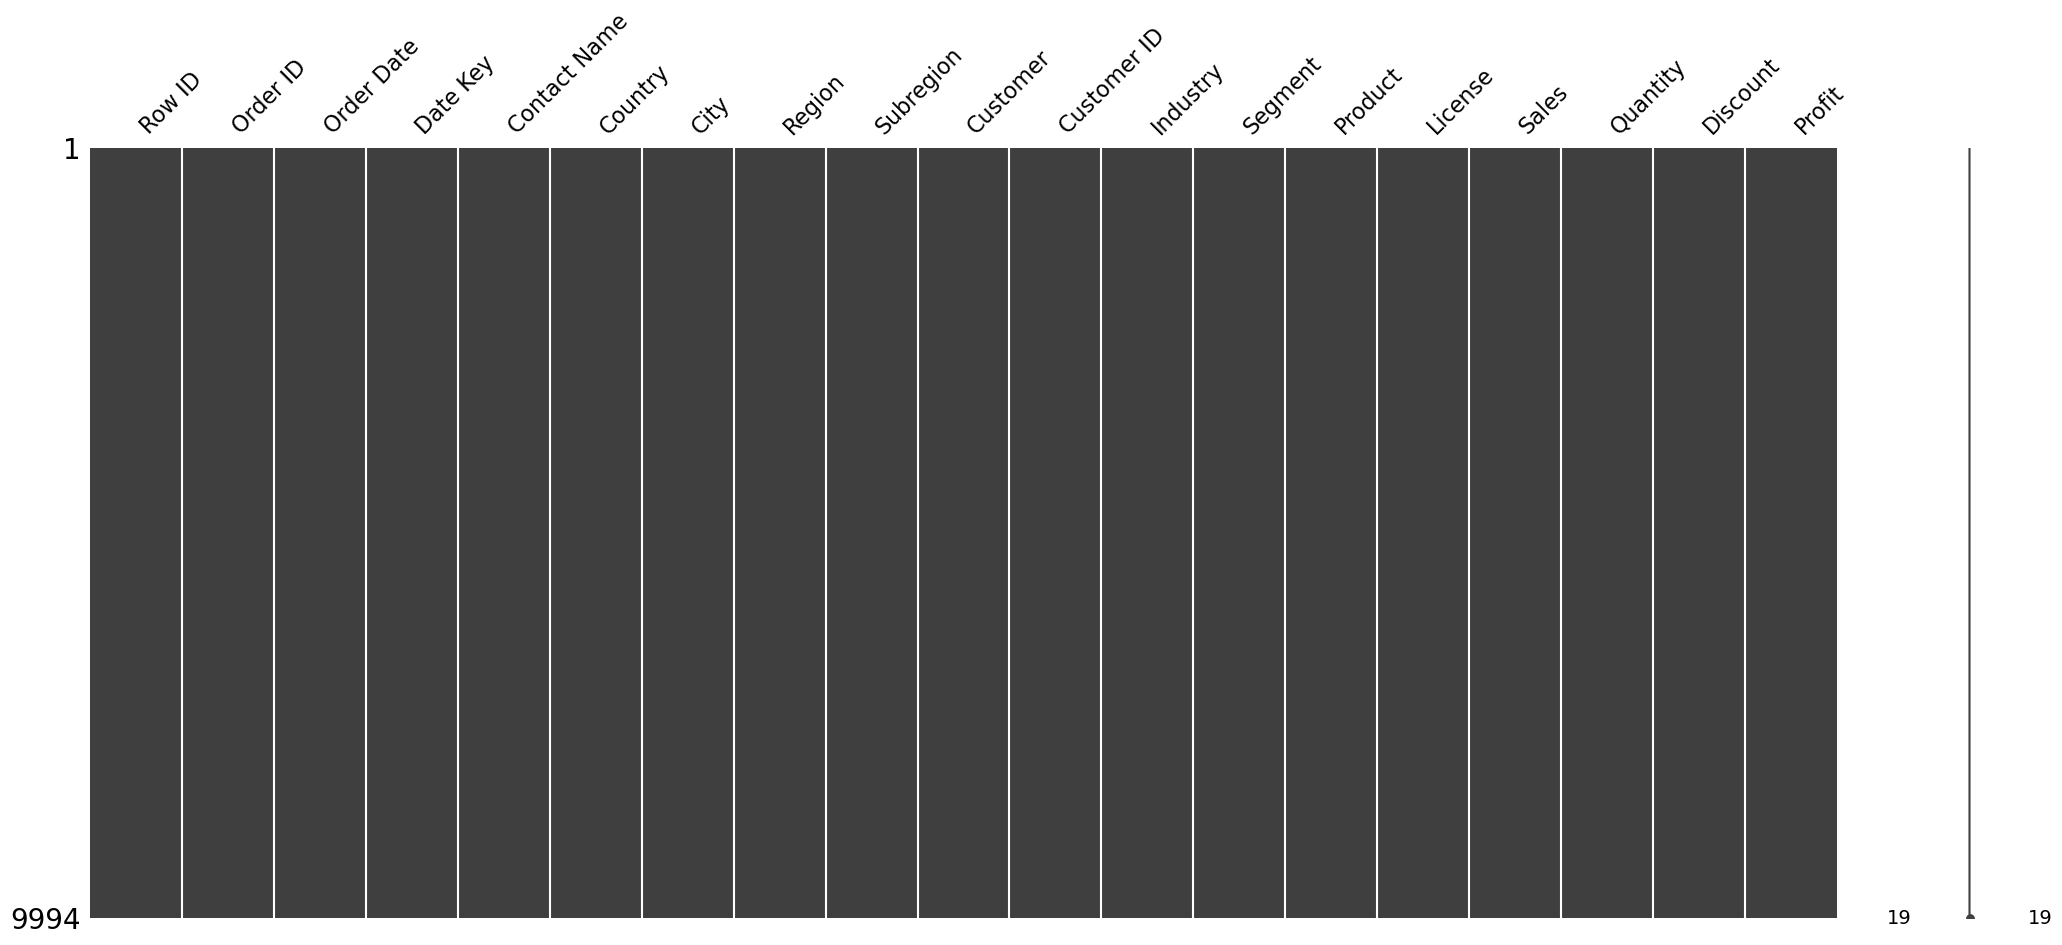

In [433]:
#Dalam visual ini terlihat data terisi penuh tanpa missing value
msno.matrix(df)
plt.show()

In [434]:
# Cek Duplikasi Data
print(f'Jumlah duplikasi data di dataset df = {df.duplicated().sum()}')

Jumlah duplikasi data di dataset df = 0


In [435]:
# Menampilkan Unique Values pada setiap nama kolom
pd.set_option('display.max_colwidth', None)

listItem = []
max_unique_values = 5 

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) > max_unique_values:
        unique_values = unique_values[:max_unique_values].tolist() + ['...'] 
    listItem.append([col, df[col].nunique(), unique_values])

tabel_unik_desc = pd.DataFrame(columns=['Column Name', 'Unique Count', 'Unique Values'],
                                 data=listItem)

tabel_unik_desc



,Column Name,Unique Count,Unique Values
0,Row ID,9994,"[1, 2, 3, 4, 5, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, ...]"
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, ...]"
5,Country,48,"[Ireland, United States, Germany, Sweden, Canada, ...]"
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, ...]"
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, ...]"
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, ...]"


Dari hasil penghitungan jumlah data unik pada setiap kolom, kita dapat melihat bahwa:
- Kolom `License` hanya memiliki satu nilai unik, sehingga tidak memberikan informasi tambahan yang berguna. Dapat dipertimbangkan untuk dilakukan drop kolom.
- kolom `Customer ID` dan kolom `Customer` memiliki jumlah data unik yang sama, sehingga dapat dianggap sebagai identifikasi unik dari pelanggan. Kita dapat mempertimbangkan untuk menggunakan salah satu dari kedua kolom ini dalam analisis selanjutnya.
- Merubah tipe data `Customer ID` menjadi object.
- Kolom `Country`, `City`, `Region`, `Subregion`, `Industry`, `Segment`, `Product` memiliki jumlah data unik yang cukup berulang dan dapat kita rubah bentuk data menjadi kategorikal.
- Kolom `Order Date` atau `Date Key` dapat kita rubah menjadi format datetime.
- Kolom `Sales`, `Quantity`, `Discount`, dan `Profit` memiliki tipe data numerik dan dapat kita gunakan untuk analisis lebih lanjut.      
- Menambah kolom `Country Code` untuk memudahkan data visualisasi.
- Kolom `Row ID` dapat kita drop karena tidak memberikan informasi yang berguna dalam analisis.

In [436]:
# Mengubah tipe data menjadi kategori
cat_list = ['Country', 'City', 'Region', 'Subregion', 'Industry', 'Segment', 'Product']
df[cat_list] = df[cat_list].astype('category') 

In [437]:
# Mengubah tipe data menjadi object
df['Customer ID'] = df['Customer ID'].astype('object')

In [438]:
# Mengubah kolom 'Order Date' menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [439]:
#Menambah kolom baru Country Code
country_codes = {
    "Argentina": "AR", "Australia": "AU", "Austria": "AT", "Belgium": "BE", "Brazil": "BR",
    "Canada": "CA", "Chile": "CL", "China": "CN", "Colombia": "CO", "Costa Rica": "CR",
    "Croatia": "HR", "Czech Republic": "CZ", "Denmark": "DK", "Egypt": "EG", "Finland": "FI",
    "France": "FR", "Germany": "DE", "Greece": "GR", "Iceland": "IS", "India": "IN",
    "Indonesia": "ID", "Ireland": "IE", "Israel": "IL", "Italy": "IT", "Japan": "JP",
    "Luxembourg": "LU", "Mexico": "MX", "Netherlands": "NL", "New Zealand": "NZ", "Norway": "NO",
    "Philippines": "PH", "Poland": "PL", "Portugal": "PT", "Qatar": "QA", "Russia": "RU",
    "Saudi Arabia": "SA", "Singapore": "SG", "Slovenia": "SI", "South Africa": "ZA", "South Korea": "KR",
    "Spain": "ES", "Sweden": "SE", "Taiwan": "TW", "Turkey": "TR", "Ukraine": "UA",
    "United Arab Emirates": "AE", "United Kingdom": "GB", "United States": "US"
}

# Tambahkan kolom baru 'Country Code'
df["Country Code"] = df["Country"].map(country_codes)
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Country Code
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,IE
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,IE
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,US
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,DE
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,DE


In [440]:
# Membuat salinan data asli ke dalam data copy bernama df_clean
df_clean = df.copy()

In [441]:
# Drop kolom 'Row ID'
df_clean.drop(columns=['Row ID','License'], inplace=True)

In [442]:
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Country Code
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,IE
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,IE
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,US
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,DE
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,DE


In [443]:
#Memberi urutan baru kolom
current_columns = df_clean.columns.tolist()
new_columns = ['Order Date',
 'Date Key',
 'Contact Name',
 'Country',
 'Country Code',
 'City',
 'Region',
 'Subregion',
 'Customer',
 'Customer ID',
 'Industry',
 'Segment',
 'Product',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 ]
df_clean = df_clean[new_columns]
df_clean.head()

,Order Date,Date Key,Contact Name,Country,Country Code,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,2022-11-09,20221109,Nathan Bell,Ireland,IE,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,2022-11-09,20221109,Nathan Bell,Ireland,IE,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,2022-06-13,20220613,Deirdre Bailey,United States,US,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,2021-10-11,20211011,Zoe Hodges,Germany,DE,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,2021-10-11,20211011,Zoe Hodges,Germany,DE,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


In [444]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Date Key      9994 non-null   int64         
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   category      
 4   Country Code  9994 non-null   category      
 5   City          9994 non-null   category      
 6   Region        9994 non-null   category      
 7   Subregion     9994 non-null   category      
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   object        
 10  Industry      9994 non-null   category      
 11  Segment       9994 non-null   category      
 12  Product       9994 non-null   category      
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

Setelah dilakukan pengecekan data, data sudah bersih dan siap untuk dilakukan analisis lebih lanjut. Selanjutnya, kita akan melakukan analisis data untuk mengetahui karakteristik data yang ada.
Data yang kita pakai adalah **`df_clean`** yang merupakan data yang sudah di cleaning.


# **Goals: Menelusuri Dampak Diskon terhadap Profitabilitas: Perspektif Produk, Industri, dan Customer**

### **A. Analisa Hubungan Sales, Discount, dan Profit**
- A1. Melihat tren `Sales` dan `Profit` berdasarkan tahun.
- A2. Mencari korelasi antara variabel-variabel seperti `Sales`, `Discount`, dan `Profit`.
- A3. Menemukan pola `Sales` dan `Profit` berdasarkan `Product` dan `Country` dengan mengunakan analisa Pareto.
- A4. Melakukan analisa `Discount`.

### **B. Analisa Industri, Customer, dan Pengaruh Diskon terhadap Profit**
- B1. Menemukan `Industry` yang paling banyak melakukan transaksi.
- B2.Menemukan `Product` berdasarkan `Industry` yang dipengaruhi oleh `Discount`.
- B3. Menemukan `Customer` berdasarkan `Product` dan `Discount`

---

# **Exploratory Data Analysis (EDA)**
Dalam tahap ini sebagai **Tim Business Intelligence (BI) XCloud** kita akan melakukan proses explorasi data untuk mendapatkan insight yang lebih dalam tentang data penjualan yang dimiliki oleh perusahaan **XCloud**.

In [445]:
display(df_clean.describe(), df_clean.describe(include='object'),df_clean.describe(include='category'))

,Order Date,Date Key,Sales,Quantity,Discount,Profit
count,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,2.021803e+07,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,2.020010e+07,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,2.021052e+07,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,2.022063e+07,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,2.023052e+07,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,2.023123e+07,22638.480000,14.000000,0.800000,8399.976000
std,NaN,1.123898e+04,623.245101,2.225110,0.206452,234.260108


,Contact Name,Customer,Customer ID
count,9994,9994,9994
unique,793,99,99
top,Leonard Kelly,Allianz,1080
freq,37,192,192


,Country,Country Code,City,Region,Subregion,Industry,Segment,Product
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,48,48,262,3,12,10,3,14
top,United States,US,London,EMEA,NAMER,Finance,SMB,ContactMatcher
freq,2001,2001,922,4219,2507,2127,5191,1842


Dari data di atas, kita dapat melakukan explorasi data untuk menemukan pola dan tren yang mungkin ada dalam data penjualan. 

---

## **A. Analisa Hubungan Sales, Discount, dan Profit**

Tim Business Intelligence (BI) XCloud menganalisis hubungan antara Sales, Discount, dan Profit untuk memahami dampaknya pada profitabilitas. Apakah diskon benar-benar meningkatkan penjualan (Sales vs. Discount)? Seberapa besar diskon mempengaruhi keuntungan (Discount vs. Profit)? Dan apakah penjualan tinggi selalu berbanding lurus dengan profit (Sales vs. Profit)? Analisis ini membantu tim dalam menemukan produk dan pelanggan yang perlu dievaluasi.

- `Sales` vs. `Profit` → Apakah penjualan tinggi selalu menghasilkan profit tinggi?
- `Sales` vs. `Discount` → Apakah diskon benar-benar meningkatkan penjualan?
- `Discount` vs. `Profit` → Seberapa besar diskon mengurangi keuntungan?


### A1. Melihat tren `Sales` dan `Profit` berdasarkan tahun.

In [446]:
# Hitung Trend Sales
df_clean['Year'] = df_clean['Order Date'].dt.year
sales_trend_year = df_clean.groupby('Year')['Sales'].sum().reset_index()
sales_trend_year

,Year,Sales
0,2020,484247.4981
1,2021,470532.5090
2,2022,608473.8300
3,2023,733947.0232


In [447]:
#Hitung Trend Profit
profit_trend_year = df_clean.groupby('Year')['Profit'].sum().reset_index()
profit_trend_year

,Year,Profit
0,2020,49543.9741
1,2021,61618.6037
2,2022,81726.9308
3,2023,93507.5131


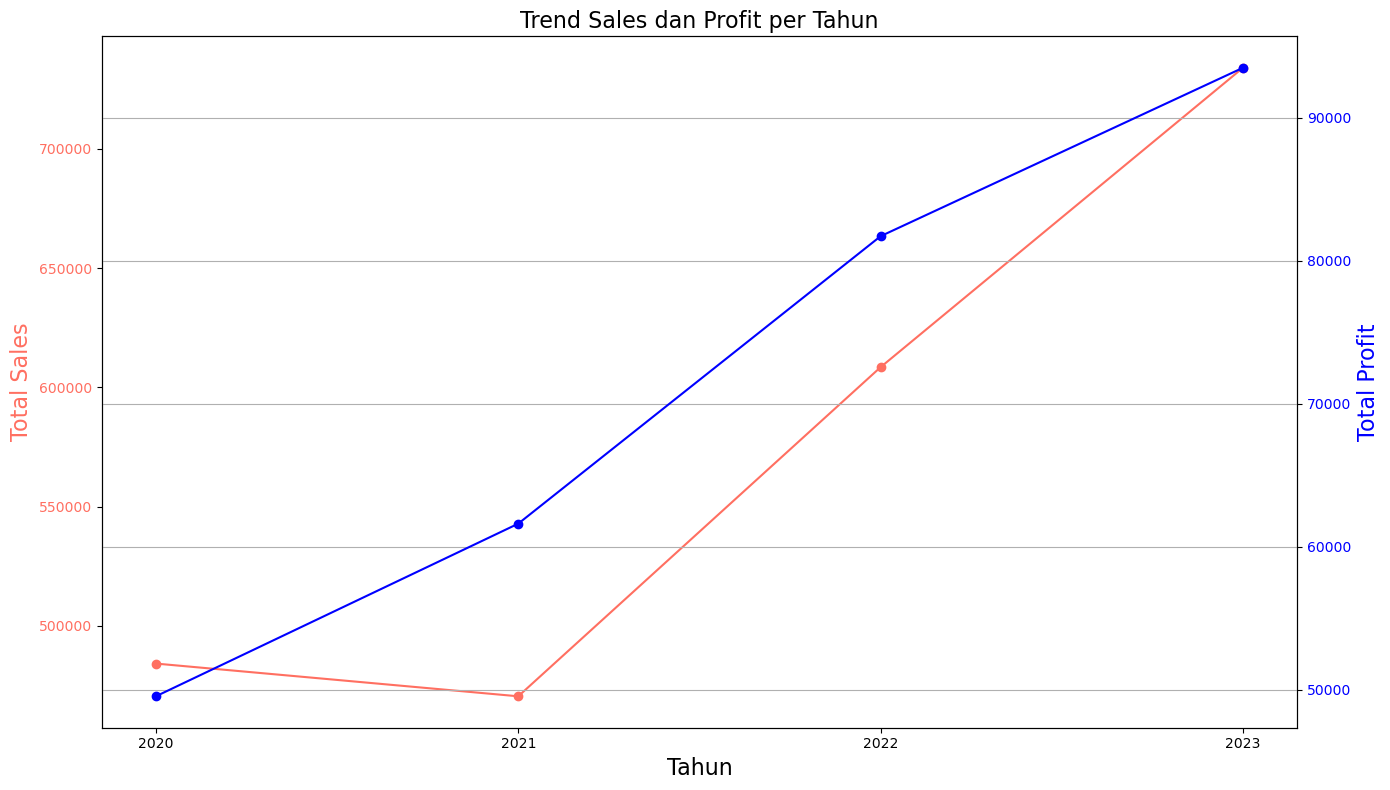

In [448]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_xlabel('Tahun', fontsize=16)
ax1.set_ylabel('Total Sales', color='#FF6F61',fontsize=16)
ax1.plot(sales_trend_year['Year'], sales_trend_year['Sales'], color='#FF6F61', marker='o', label='Total Penjualan')
ax1.tick_params(axis='y', labelcolor='#FF6F61')


ax2 = ax1.twinx()
ax2.set_ylabel('Total Profit', color='blue', fontsize=16)
ax2.plot(profit_trend_year['Year'], profit_trend_year['Profit'], color='blue', marker='o', label='Total Keuntungan')
ax2.tick_params(axis='y', labelcolor='blue')


plt.title('Trend Sales dan Profit per Tahun', fontsize= 16)
fig.tight_layout()  
plt.grid()
plt.xticks(sales_trend_year['Year'])

plt.show()

**Analisa Chart**

 **Total Sales - Biru:**
- Total sales mengalami sedikit penurunan dari 2020 ke 2021.
- Namun, dari 2021 ke 2023, sales meningkat dengan signifikan.
- Tren ini menunjukkan pemulihan dan pertumbuhan penjualan setelah tahun 2021.

 **Total Profit - Orange:**
- Profit mengalami peningkatan yang konsisten setiap tahun dari 2020 hingga 2023.
- Visual menunjukkan bahwa meskipun ada sedikit penurunan dalam sales tahun 2021, profit tetap meningkat.

#### **Insight:**
- Bisnis mengalami penurunan penjualan di tahun 2021, tetapi berhasil bangkit dan tumbuh pesat di tahun berikutnya.
Pada tahun 2020-2021 pasar dunia mengalami dampak global Pandemi Covid, data penjualan ini mungkin saja terkena. [Referensi](https://www.eleken.co/blog-posts/saas-market-overview) 

---

### A2. Mencari korelasi antara variabel-variabel seperti `Sales`, `Discount`, dan `Profit`.

Data Profit tidak terdistribusi normal


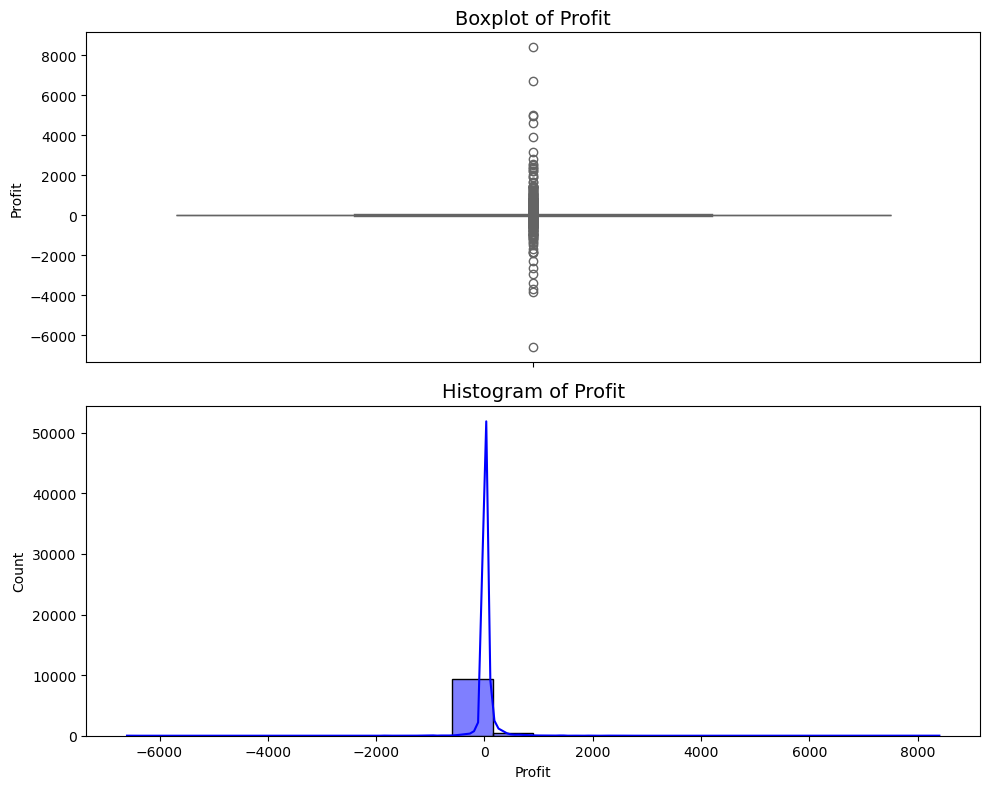

In [449]:
# Normality test Profit
stat, p = normaltest(df_clean['Profit'])
alpha = 0.05
if p > alpha:
    print("Data Profit terdistribusi normal")
else:
    print("Data Profit tidak terdistribusi normal")


fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Boxplot Profit 
sns.boxplot(y=df_clean["Profit"], ax=axs[0], color="#5A4EFF")
axs[0].set_title("Boxplot of Profit", fontsize=14)
axs[0].set_ylabel("Profit")

# Histplot Profit 
sns.histplot(df_clean["Profit"], bins=20, kde=True, ax=axs[1], color="blue")
axs[1].set_title("Histogram of Profit", fontsize=14)
axs[1].set_xlabel("Profit")


plt.tight_layout()
plt.show()

Data Sales tidak terdistribusi normal


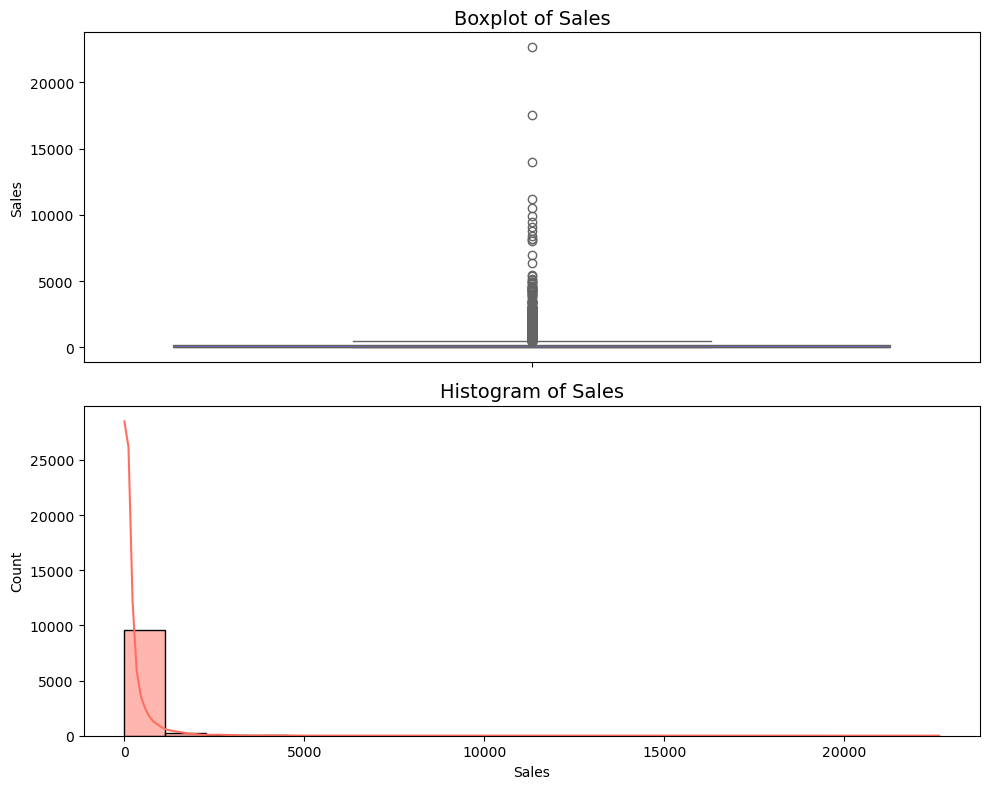

In [450]:
# Normality test Sales
stat, p = normaltest(df_clean['Sales'])
alpha = 0.05
if p > alpha:
    print("Data Sales terdistribusi normal")
else:
    print("Data Sales tidak terdistribusi normal")


fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Boxplot Profit 
sns.boxplot(y=df_clean["Sales"], ax=axs[0], color="#5A4EFF")
axs[0].set_title("Boxplot of Sales", fontsize=14)
axs[0].set_ylabel("Sales")

# Histplot Profit 
sns.histplot(df_clean["Sales"], bins=20, kde=True, ax=axs[1], color="#FF6F61")
axs[1].set_title("Histogram of Sales", fontsize=14)
axs[1].set_xlabel("Sales")

plt.tight_layout()
plt.show()

Karena data Profit dan Sales tidak terdistribusi normal, metode Pearson tidak digunakan. Sebagai gantinya, digunakan metode Spearman yang lebih sesuai untuk data non-normal dan dapat mengukur hubungan antara variabel.

In [451]:
spd_corr = df_clean[['Sales', 'Profit', 'Discount']].corr()
spd_corr

,Sales,Profit,Discount
Sales,1.000000,0.479064,-0.028190
Profit,0.479064,1.000000,-0.219487
Discount,-0.028190,-0.219487,1.000000


Koefisien Korelasi antara Sales dan Profit: 0.5184066611400607


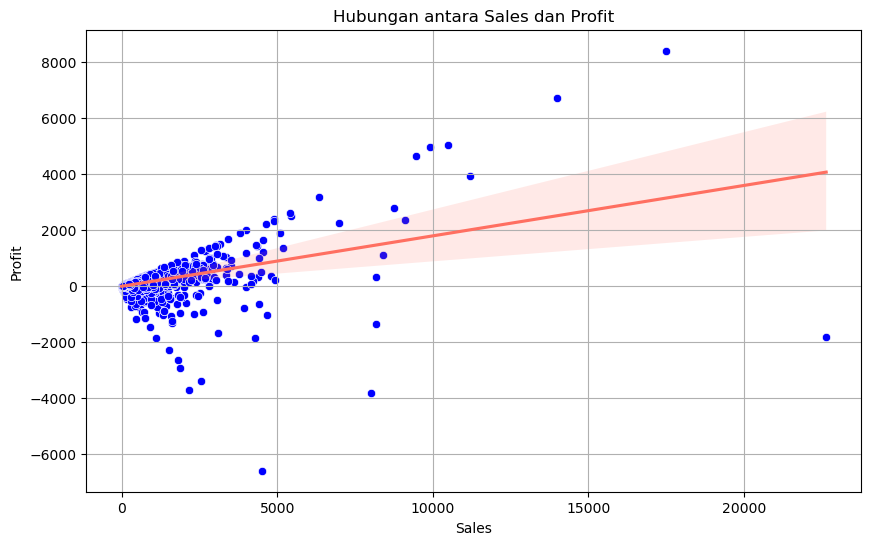

In [452]:
# korelasi antara Sales dan Profit
corr_sp = df_clean[['Sales', 'Profit']].corr(method='spearman').iloc[0, 1]
print('Koefisien Korelasi antara Sales dan Profit:', corr_sp)

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Sales', y='Profit', color='blue')
plt.title('Hubungan antara Sales dan Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# garis regresi
sns.regplot(data=df_clean, x='Sales', y='Profit', scatter=False, color='#FF6F61')

plt.grid()
plt.show()

In [453]:
# Menghitung korelasi Spearman antara Sales dan Profit
correlation_sp, p_value_sp = stats.spearmanr(df_clean["Sales"], df_clean["Profit"])

# Menampilkan hasil korelasi dan p-value
print(f"Korelasi antara Sales dan Profit: {correlation_sp:.4f}")
print(f"P-value: {p_value_sp:.4f}")

# Hipotesis
print("H0: Tidak ada hubungan signifikan antara Sales dan Profit.")
print("H1: Semakin tinggi Sales, semakin tinggi Profit.")

# Kesimpulan uji statistik
alpha = 0.05  # Tingkat signifikansi 5%
if p_value_sp < alpha:
    print("Keputusan: Tolak H0, terima H1. Hasil signifikan: Semakin tinggi Sales, semakin tinggi Profit.")
else:
    print("Keputusan: Gagal tolak H0, terima H0. Tidak ada bukti signifikan bahwa Sales mempengaruhi Profit.")

Korelasi antara Sales dan Profit: 0.5184
P-value: 0.0000
H0: Tidak ada hubungan signifikan antara Sales dan Profit.
H1: Semakin tinggi Sales, semakin tinggi Profit.
Keputusan: Tolak H0, terima H1. Hasil signifikan: Semakin tinggi Sales, semakin tinggi Profit.


Korelasi antara Sales dan Profit
- **Nilai korelasi: 0.518**
- Ini menunjukkan hubungan positif sedang. Artinya, ketika penjualan (Sales) meningkat, keuntungan (Profit) cenderung meningkat juga.

Koefisien Korelasi antara Discount dan Profit: -0.5433501822306211


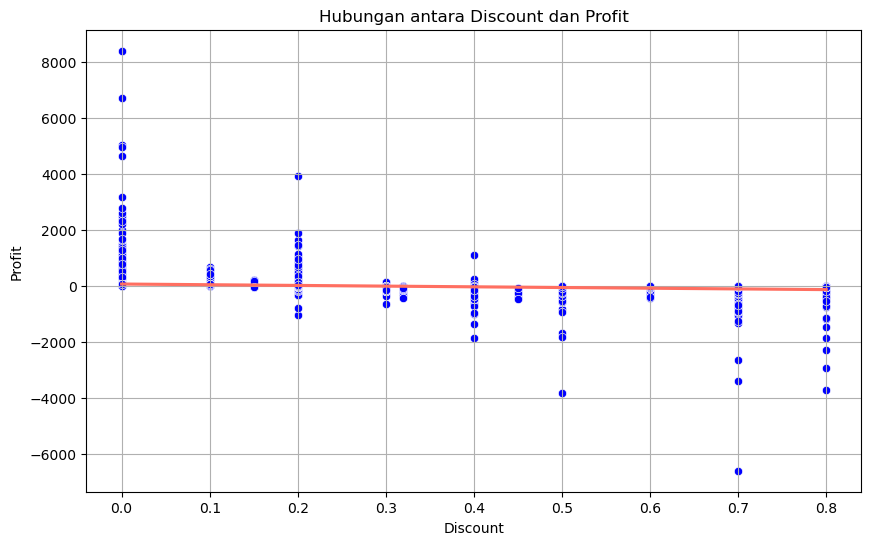

In [454]:
# korelasi antara Diskon dan Profit
corr_dp = df_clean[['Discount', 'Profit']].corr(method='spearman').iloc[0, 1]
print('Koefisien Korelasi antara Discount dan Profit:', corr_dp)

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Discount', y='Profit', color='blue')
plt.title('Hubungan antara Discount dan Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

# garis regresi
sns.regplot(data=df_clean, x='Discount', y='Profit', scatter=False, color='#FF6F61')

plt.grid()
plt.show()

In [455]:
# Menghitung korelasi Sperman antara Diskon dan Profit
correlation_profit, p_value_profit = stats.spearmanr(df_clean["Discount"], df["Profit"])

# Menampilkan hasil korelasi dan p-value
print(f"Korelasi antara Diskon dan Profit: {correlation_profit:.4f}")
print(f"P-value Profit: {p_value_profit:.4f}")

# Hipotesis untuk Profit
print("H0: Tidak ada hubungan signifikan antara diskon dan profit.")
print("H1: Semakin tinggi diskon, semakin kecil profit.")

# Kesimpulan uji statistik Profit
alpha = 0.05  # Tingkat signifikansi 5%
if p_value_profit < alpha:
    print("Keputusan: Tolak H0, terima H1. Hasil signifikan: Semakin tinggi diskon, semakin kecil profit.")
else:
    print("Keputusan: Tolak H1, terima H0. Tidak ada bukti signifikan bahwa diskon mempengaruhi profit.")

Korelasi antara Diskon dan Profit: -0.5434
P-value Profit: 0.0000
H0: Tidak ada hubungan signifikan antara diskon dan profit.
H1: Semakin tinggi diskon, semakin kecil profit.
Keputusan: Tolak H0, terima H1. Hasil signifikan: Semakin tinggi diskon, semakin kecil profit.


Korelasi antara Discount dan Profit
- **Nilai korelasi: -0.5434**
- Ini menunjukkan hubungan negatif sedang. Artinya, semakin besar diskon yang diberikan, semakin kecil kemungkinan untuk mendapatkan keuntungan besar.

Koefisien Korelasi antara Discount dan Sales: -0.028190124157535527


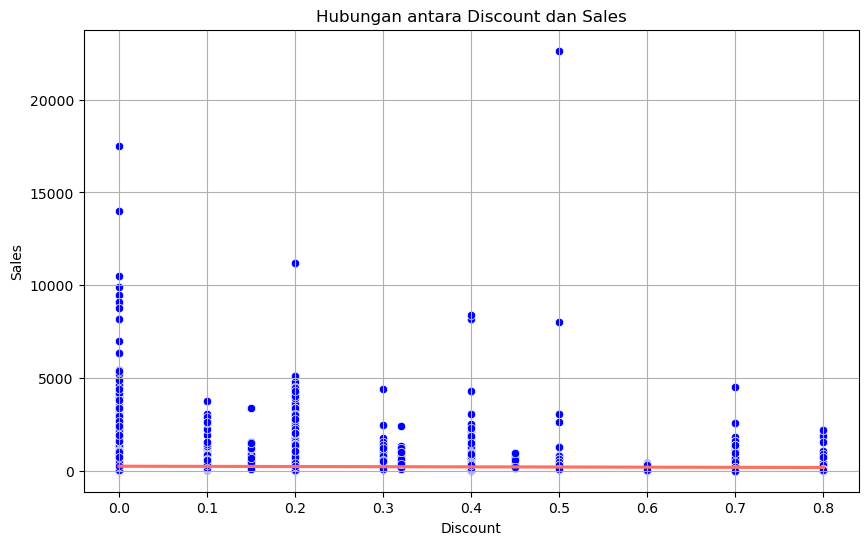

In [456]:
# korelasi antara Diskon dan Sales
corr_sd = df_clean[['Discount', 'Sales']].corr().iloc[0, 1]
print('Koefisien Korelasi antara Discount dan Sales:', corr_sd)

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Discount', y='Sales', color='blue')
plt.title('Hubungan antara Discount dan Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

# garis regresi
sns.regplot(data=df_clean, x='Discount', y='Sales', scatter=False, color='#FF6F61')

plt.grid()
plt.show()

In [457]:
# Menghitung korelasi Spearman antara Diskon dan Sales
correlation_sales, p_value_sales = stats.spearmanr(df_clean["Discount"], df["Sales"])

# Menampilkan hasil korelasi dan p-value
print(f"Korelasi antara Diskon dan Sales: {correlation_sales:.4f}")
print(f"P-value: {p_value_sales:.4f}")

# Hipotesis
print("H0: Tidak ada hubungan signifikan antara sales dan diskon.")
print("H1: Semakin tinggi sales, semakin banyak diskon yang diberikan.")

# Kesimpulan uji statistik
alpha = 0.05  # Tingkat signifikansi 5%
if p_value_sales < alpha:
    print("Keputusan: Tolak H0, terima H1. Hasil signifikan: Semakin tinggi sales, semakin banyak diskon yang diberikan.")
else:
    print("Keputusan: Gagal tolak H0, terima H0. Tidak ada bukti signifikan bahwa sales mempengaruhi diskon.")


Korelasi antara Diskon dan Sales: -0.0570
P-value: 0.0000
H0: Tidak ada hubungan signifikan antara sales dan diskon.
H1: Semakin tinggi sales, semakin banyak diskon yang diberikan.
Keputusan: Tolak H0, terima H1. Hasil signifikan: Semakin tinggi sales, semakin banyak diskon yang diberikan.


Korelasi antara Discount dan Sales
- **Nilai korelasi: -0.0570**
- Ini menunjukan negatif sedang, artinya pemberian diskon mempengaruhi sales.

#### **Insight:**
- Penjualan yang tinggi tidak selalu menghasilkan keuntungan yang positif.
- Diskon yang lebih tinggi cenderung menurunkan keuntungan.
- Diskon yang diberikan mempengaruhi sales, tetapi tidak selalu berbanding lurus dengan profit.

Lakukan analisa `Sales` dan `Profit` terhadap `Product`

---

### A3. Menemukan pola `Sales` dan `Profit` berdasarkan `Product` dan `Country` dengan mengunakan analisa Pareto.

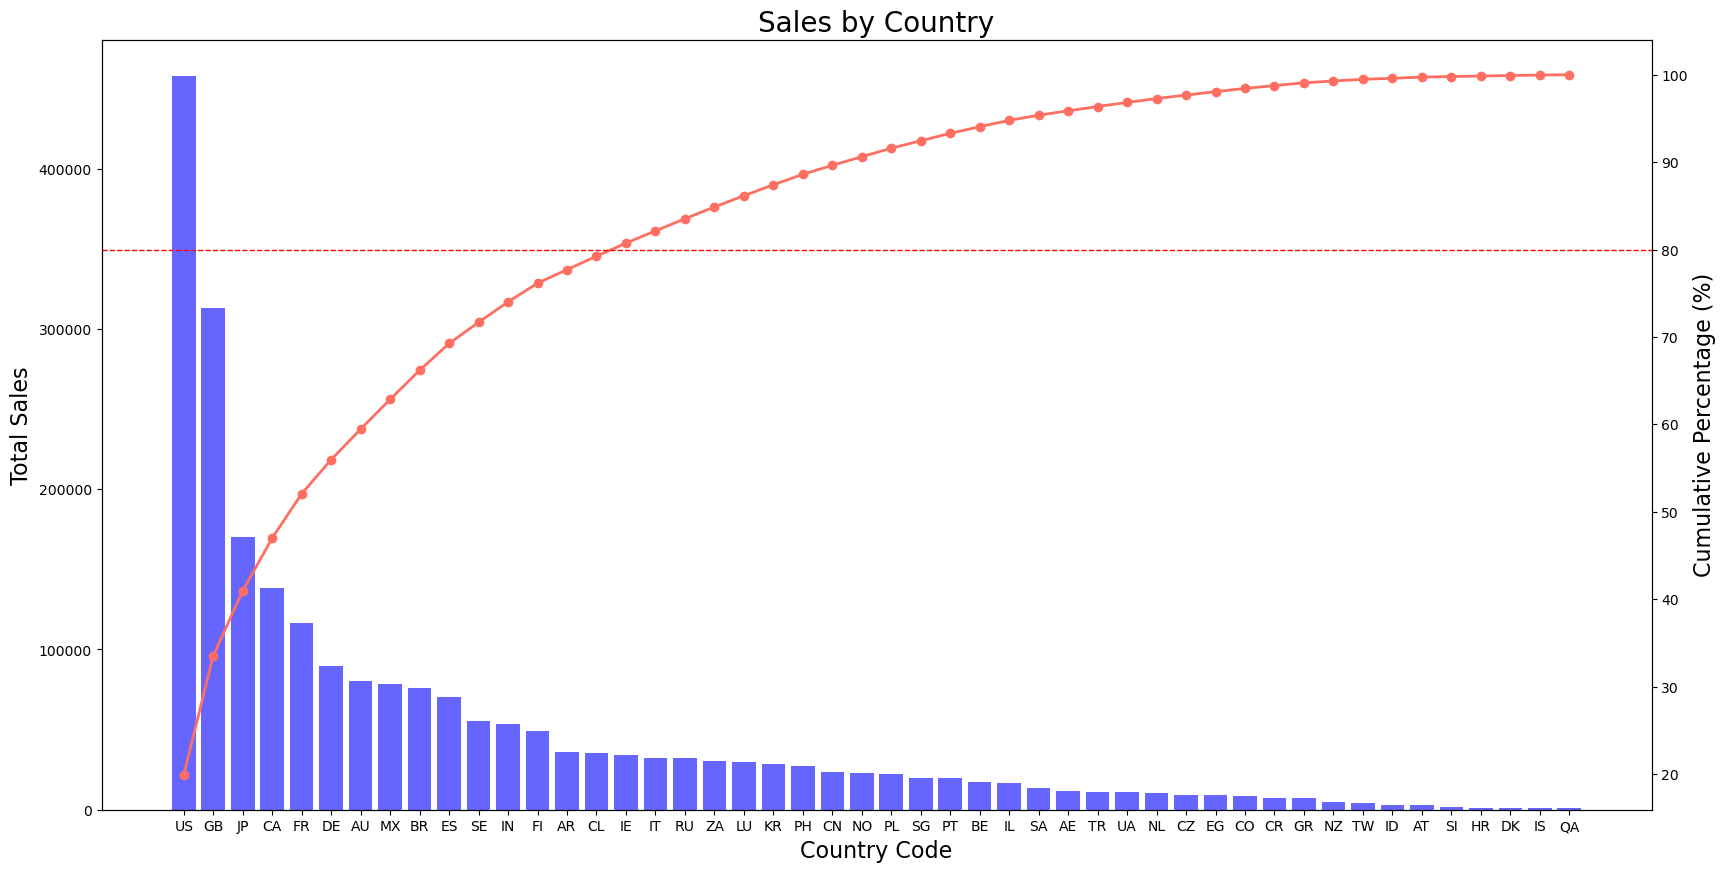

In [458]:
country_sales = df_clean.groupby("Country Code")["Sales"].sum().sort_values(ascending=False)
cumulative_percentage = country_sales.cumsum() / country_sales.sum() * 100
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.bar(country_sales.index, country_sales, color="blue", alpha=0.6)
ax1.set_ylabel("Total Sales", fontsize=16)
ax1.set_xlabel("Country Code", fontsize=16)
ax2 = ax1.twinx()
ax2.plot(country_sales.index, cumulative_percentage, color="#FF6F61", marker="o", linestyle="-", linewidth=2)
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=16)
ax2.axhline(80, color="red", linestyle="dashed", linewidth=1)
plt.xticks(rotation=45)
plt.title("Sales by Country", fontsize=20)
plt.show()

**Analisa Pareto Chart: Sales by Country**
- Garis kumulatif orange menunjukkan bahwa sekitar 80% dari total penjualan berasal dari segelintir negara di sebelah kiri grafik.
- Negara-negara dengan kode **US (Amerika Serikat), GB (Inggris), JP (Jepang), CA (Kanada), FR (Prancis), dan AU (Australia)** mendominasi kontribusi penjualan.
- **Amerika Serikat (US)** memiliki penjualan tertinggi, diikuti oleh **Inggris (GB) dan Jepang (JP)**.(Dominasi Pasar).
- Negara-negara seperti **Croatia (HR), Denmark (DK), Iceland (IS), dan Qatar (QA)** memiliki kontribusi yang sangat kecil terhadap total penjualan.


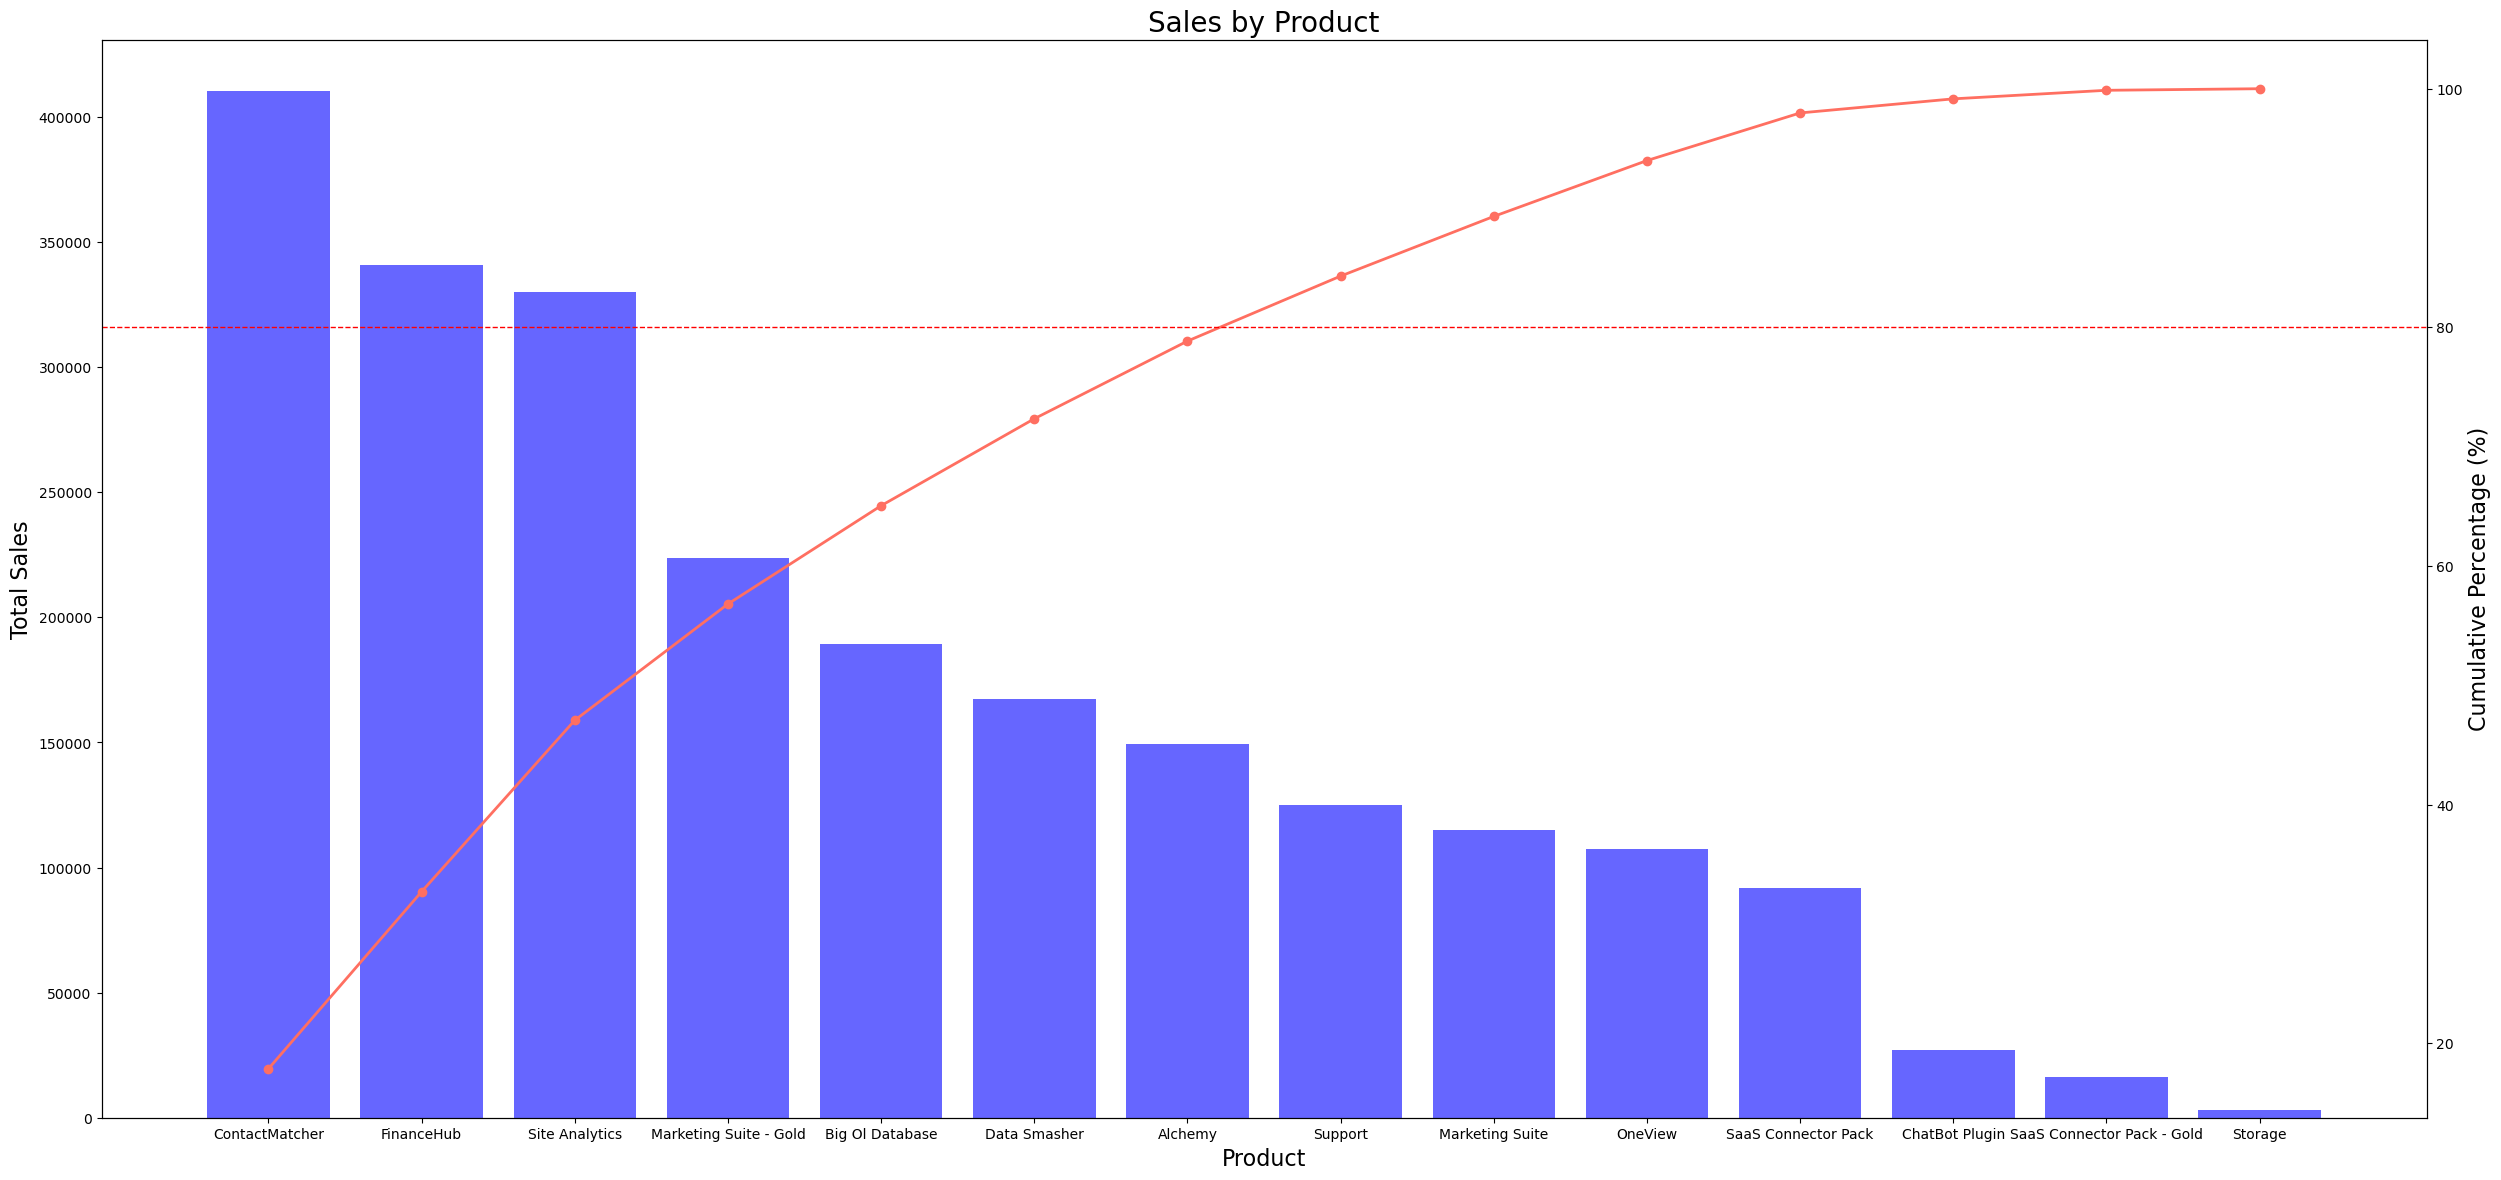

In [459]:
product_sales = df_clean.groupby("Product")["Sales"].sum().sort_values(ascending=False)
cumulative_percentage = product_sales.cumsum() / product_sales.sum() * 100
fig, ax1 = plt.subplots(figsize=(30, 14))
ax1.bar(product_sales.index, product_sales, color="blue", alpha=0.6)
ax1.set_ylabel("Total Sales", fontsize=16)
ax1.set_xlabel("Product", fontsize=16)
ax2 = ax1.twinx()
ax2.plot(product_sales.index, cumulative_percentage, color="#FF6F61", marker="o", linestyle="-", linewidth=2)
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=16)
ax2.axhline(80, color="red", linestyle="dashed", linewidth=1)
plt.xticks(rotation=45)
plt.title("Sales by Product", fontsize=20)
plt.show()

In [460]:
# Menghitung total profit per industri
product_sales = df_clean.groupby("Product")["Sales"].sum().reset_index()

# Mengurutkan dari industri dengan profit tertinggi
product_sales = product_sales.sort_values(by="Sales", ascending=False)

# Menampilkan hasil
product_sales

,Product,Sales
3,ContactMatcher,410378.2650
5,FinanceHub,340935.4150
11,Site Analytics,330007.0540
7,Marketing Suite - Gold,223843.6080
1,Big Ol Database,189238.6310
4,Data Smasher,167380.3180
0,Alchemy,149528.0300
13,Support,125152.7440
6,Marketing Suite,114879.9963
8,OneView,107532.1610


**Analisa Pareto Chart: Sales by Product**
- Produk **ContactMatcher, FinanceHub, dan Site Analytics** memiliki kontribusi terbesar terhadap total penjualan.
- Produk dengan kontribusi rendah: **Storage, SaaS Connector Pack - Gold, dan ChatBot Plugin**.
- Produk yang berada di sisi kanan grafik memiliki kontribusi kecil terhadap total penjualan.


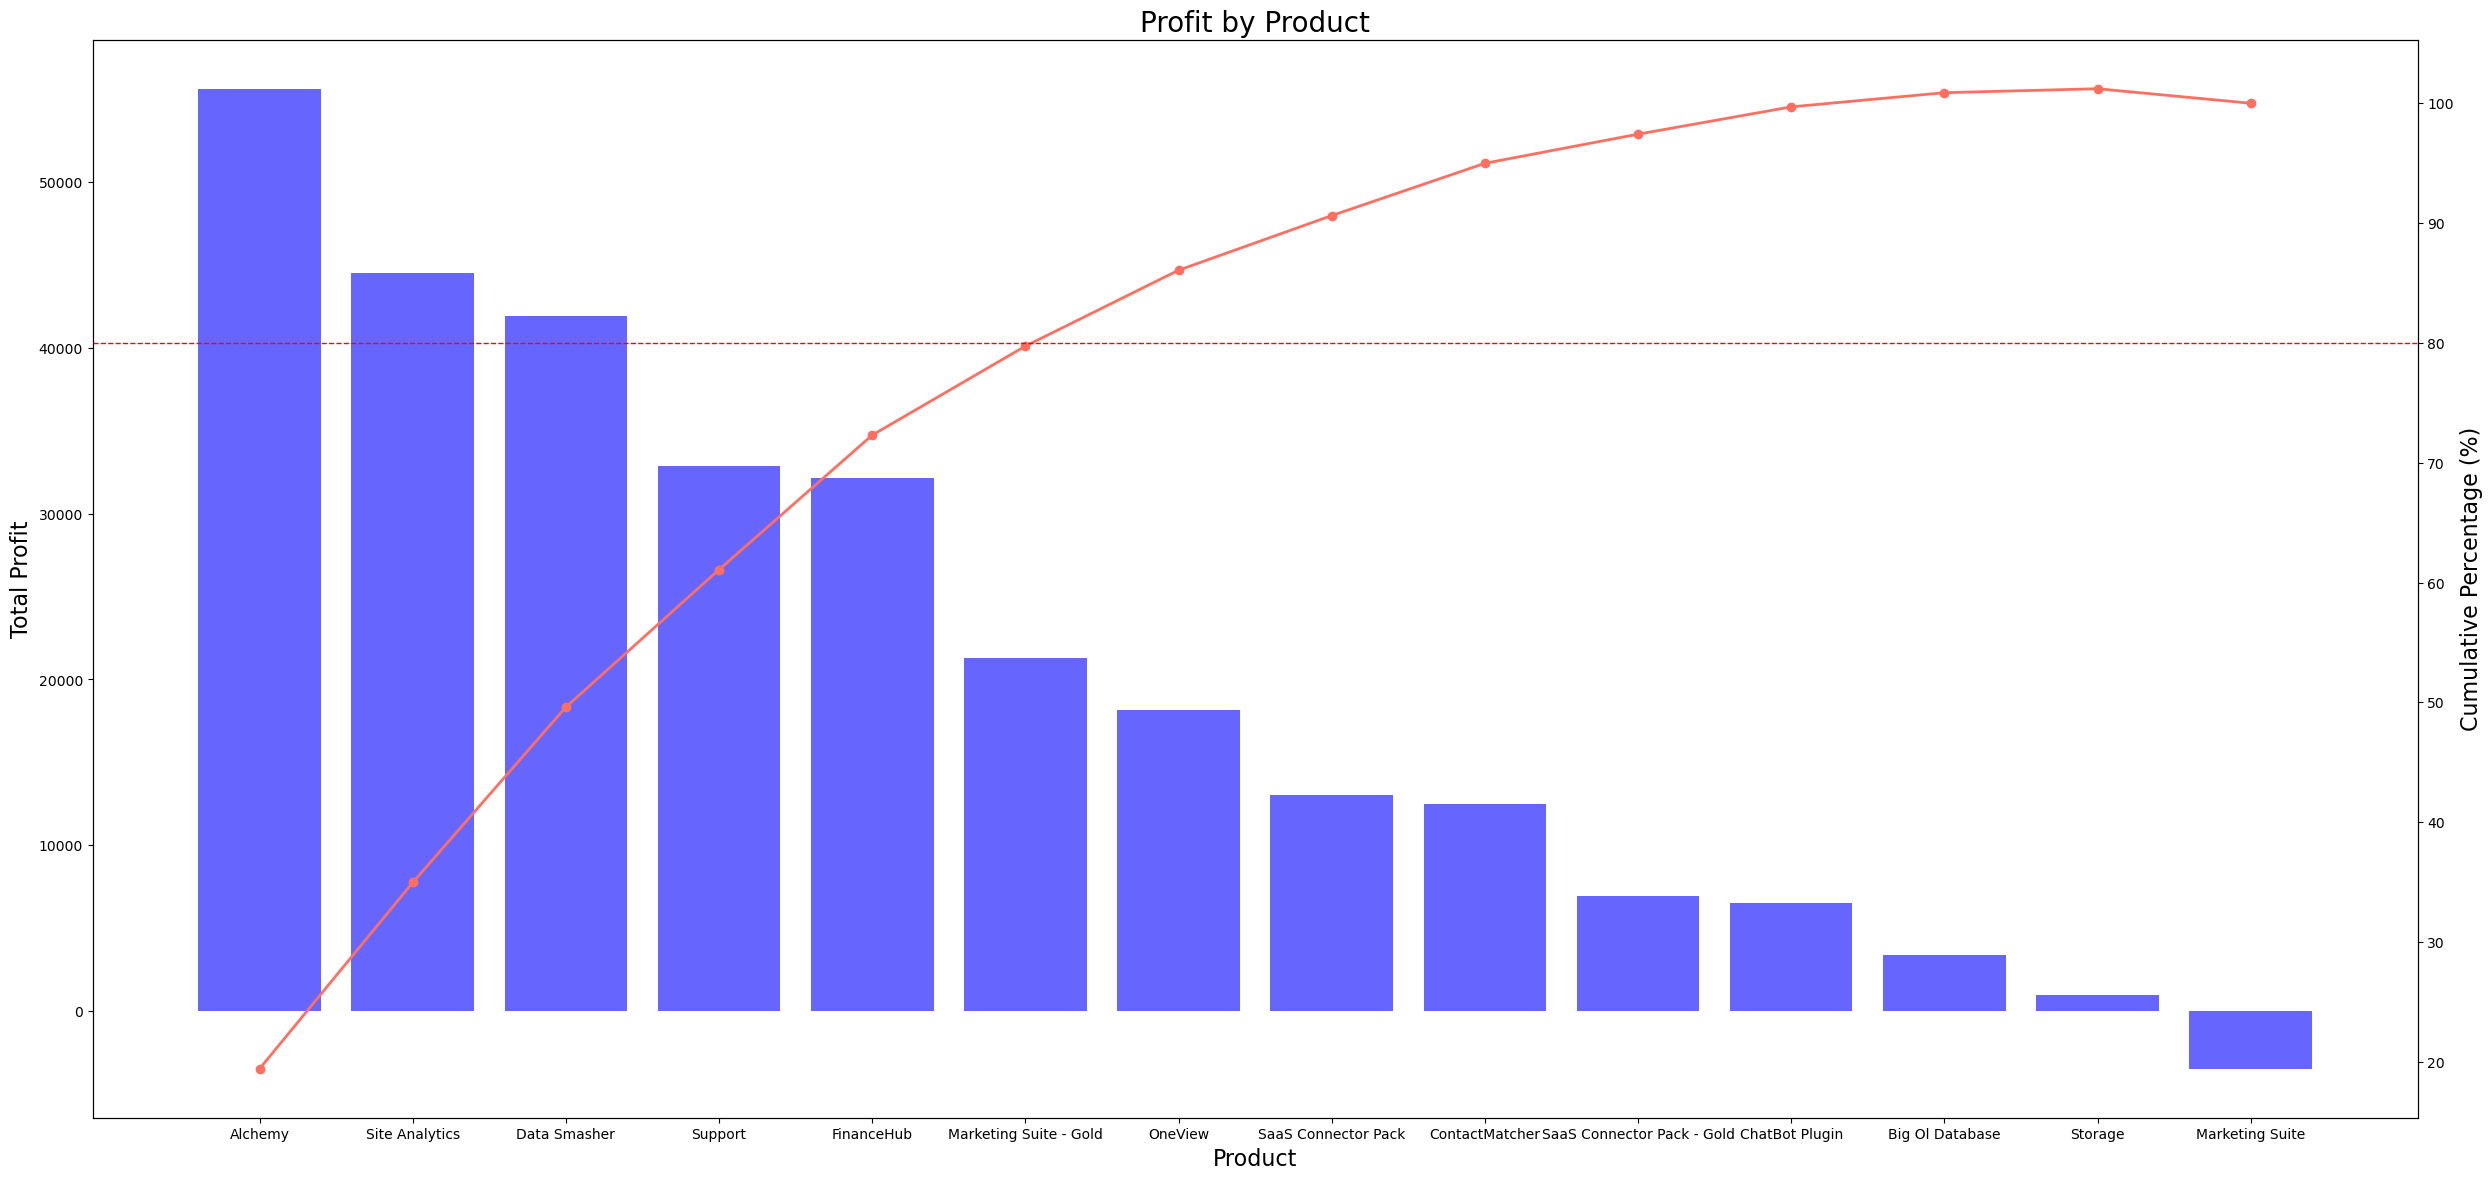

In [461]:
product_profit = df_clean.groupby("Product")["Profit"].sum().sort_values(ascending=False)
cumulative_percentage = product_profit.cumsum() / product_profit.sum() * 100
fig, ax1 = plt.subplots(figsize=(30, 14))
ax1.bar(product_profit.index, product_profit, color="blue", alpha=0.6)
ax1.set_ylabel("Total Profit", fontsize=16)
ax1.set_xlabel("Product", fontsize=16)
ax2 = ax1.twinx()
ax2.plot(product_profit.index, cumulative_percentage, color="#FF6F61", marker="o", linestyle="-", linewidth=2)
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=16)
ax2.axhline(80, color="red", linestyle="dashed", linewidth=1)
plt.xticks(rotation=45)
plt.title("Profit by Product", fontsize=20)
plt.show()

In [462]:
# Menghitung total profit per industri
product_profit = df_clean.groupby("Product")["Profit"].sum().reset_index()

# Mengurutkan dari industri dengan profit tertinggi
product_profit = product_profit.sort_values(by="Profit", ascending=False)

# Menampilkan hasil
product_profit

,Product,Profit
0,Alchemy,55617.8249
11,Site Analytics,44515.7306
4,Data Smasher,41936.6357
13,Support,32864.4698
5,FinanceHub,32136.4203
7,Marketing Suite - Gold,21278.8264
8,OneView,18138.0054
9,SaaS Connector Pack,13059.1436
3,ContactMatcher,12496.2822
10,SaaS Connector Pack - Gold,6964.1767


**Analisa Profit by Product**
- **Alchemy, Site Analytics, dan Data Smasher** adalah produk dengan profit tertinggi. Produk ini memberikan kontribusi besar terhadap total keuntungan perusahaan.
- **FinanceHub dan Support** juga memiliki profit yang signifikan.
- **Marketing Suite** memiliki **profit negatif** (kemungkinan rugi).
- **Storage dan Big Ol Database** memiliki profit sangat kecil, sehingga efektivitasnya patut dipertanyakan.

---
**Melihat data dari salah satu negara yang mendominasi pasar penjualan = (US)**

---

In [463]:
#Pareto chart sales per product per country code

# total sales per product per country code
sales_country_product = df_clean.groupby(["Country Code", "Product"])["Sales"].sum().reset_index()

# Sorting berdasarkan penjualan tertinggi per country code
sales_country_product = sales_country_product.sort_values(by=["Country Code", "Sales"], ascending=[True, False])

# def untuk membuat Pareto Chart
def pareto_sales_chart(country_code):
    country_data = sales_country_product[sales_country_product["Country Code"] == country_code]
    country_data = country_data.sort_values(by="Sales", ascending=False)
    
    # Hitung persentase kumulatif
    country_data["Cumulative %"] = country_data["Sales"].cumsum() / country_data["Sales"].sum() * 100
    
    # Plot Sales (Bar Chart)
    fig, ax1 = plt.subplots(figsize=(30, 10))
    ax1.bar(country_data["Product"], country_data["Sales"], color="blue", alpha=0.6, label="Sales")
    ax1.set_ylabel("Total Sales", fontsize=16)
    ax1.set_xlabel("Product", fontsize=16)
    ax1.set_xticklabels(country_data["Product"], rotation=45, ha="right", fontsize=16)
    
    # Plot Cumulative Percentage (Line Chart)
    ax2 = ax1.twinx()
    ax2.plot(country_data["Product"], country_data["Cumulative %"], color="#FF6F61", marker="o", linestyle="-", label="Cumulative %")
    ax2.set_ylabel("Cumulative Percentage", fontsize=16)
    ax2.axhline(y=80, color="red", linestyle="--", label="80% Threshold")
    
    
    plt.title(f"Sales by Product in {country_code}", fontsize=20)
    plt.show()


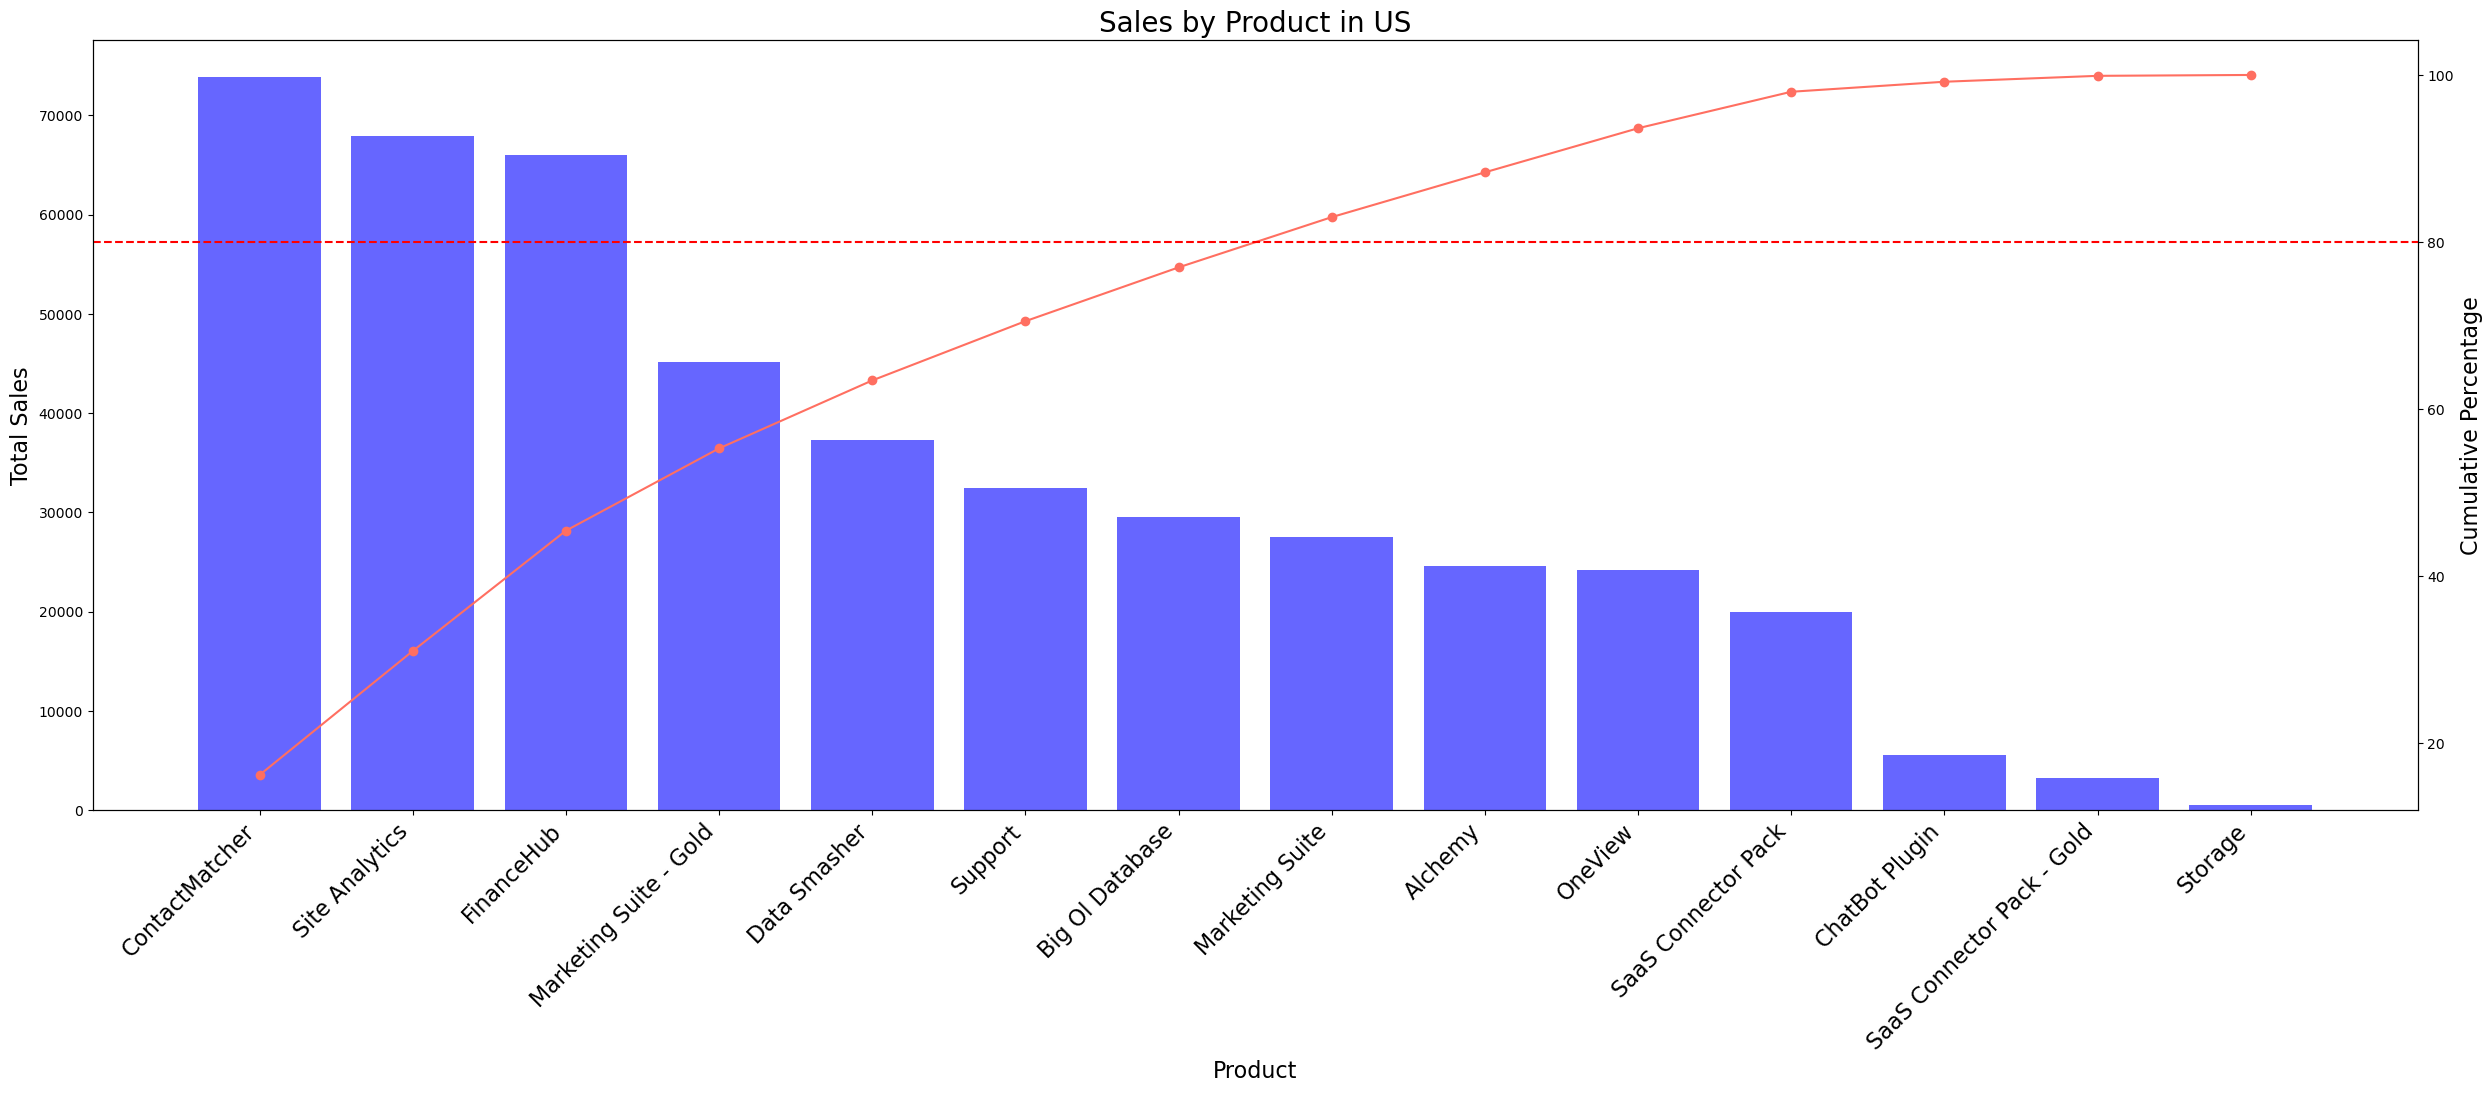

In [464]:
pareto_sales_chart("US")

In [465]:
#Pareto chart profit per product per country code

# total profit per product per country code
profit_country_product = df_clean.groupby(["Country Code", "Product"])["Profit"].sum().reset_index()

# Sorting berdasarkan profit tertinggi per country code
profit_country_product = profit_country_product.sort_values(by=["Country Code", "Profit"], ascending=[True, False])

# def untuk membuat Pareto Chart Profit
def pareto_profit_chart(country_code):
    country_data = profit_country_product[profit_country_product["Country Code"] == country_code]
    country_data = country_data.sort_values(by="Profit", ascending=False)
    
    # Hitung persentase kumulatif
    country_data["Cumulative %"] = country_data["Profit"].cumsum() / country_data["Profit"].sum() * 100
    
    # Plot Profit (Bar Chart)
    fig, ax1 = plt.subplots(figsize=(30, 10))
    ax1.bar(country_data["Product"], country_data["Profit"], color="blue", alpha=0.6, label="Profit")
    ax1.set_ylabel("Total Profit", fontsize=16)
    ax1.set_xlabel("Product", fontsize=16)
    ax1.set_xticklabels(country_data["Product"], rotation=45, ha="right", fontsize=16)
    
    # Plot Cumulative Percentage (Line Chart)
    ax2 = ax1.twinx()
    ax2.plot(country_data["Product"], country_data["Cumulative %"], color="#FF6F61", marker="o", linestyle="-", label="Cumulative %")
    ax2.set_ylabel("Cumulative Percentage", fontsize=16)
    ax2.axhline(y=80, color="red", linestyle="--", label="80% Threshold")
    
    plt.title(f"Profit by Product in {country_code}",fontsize=20)
    plt.show()

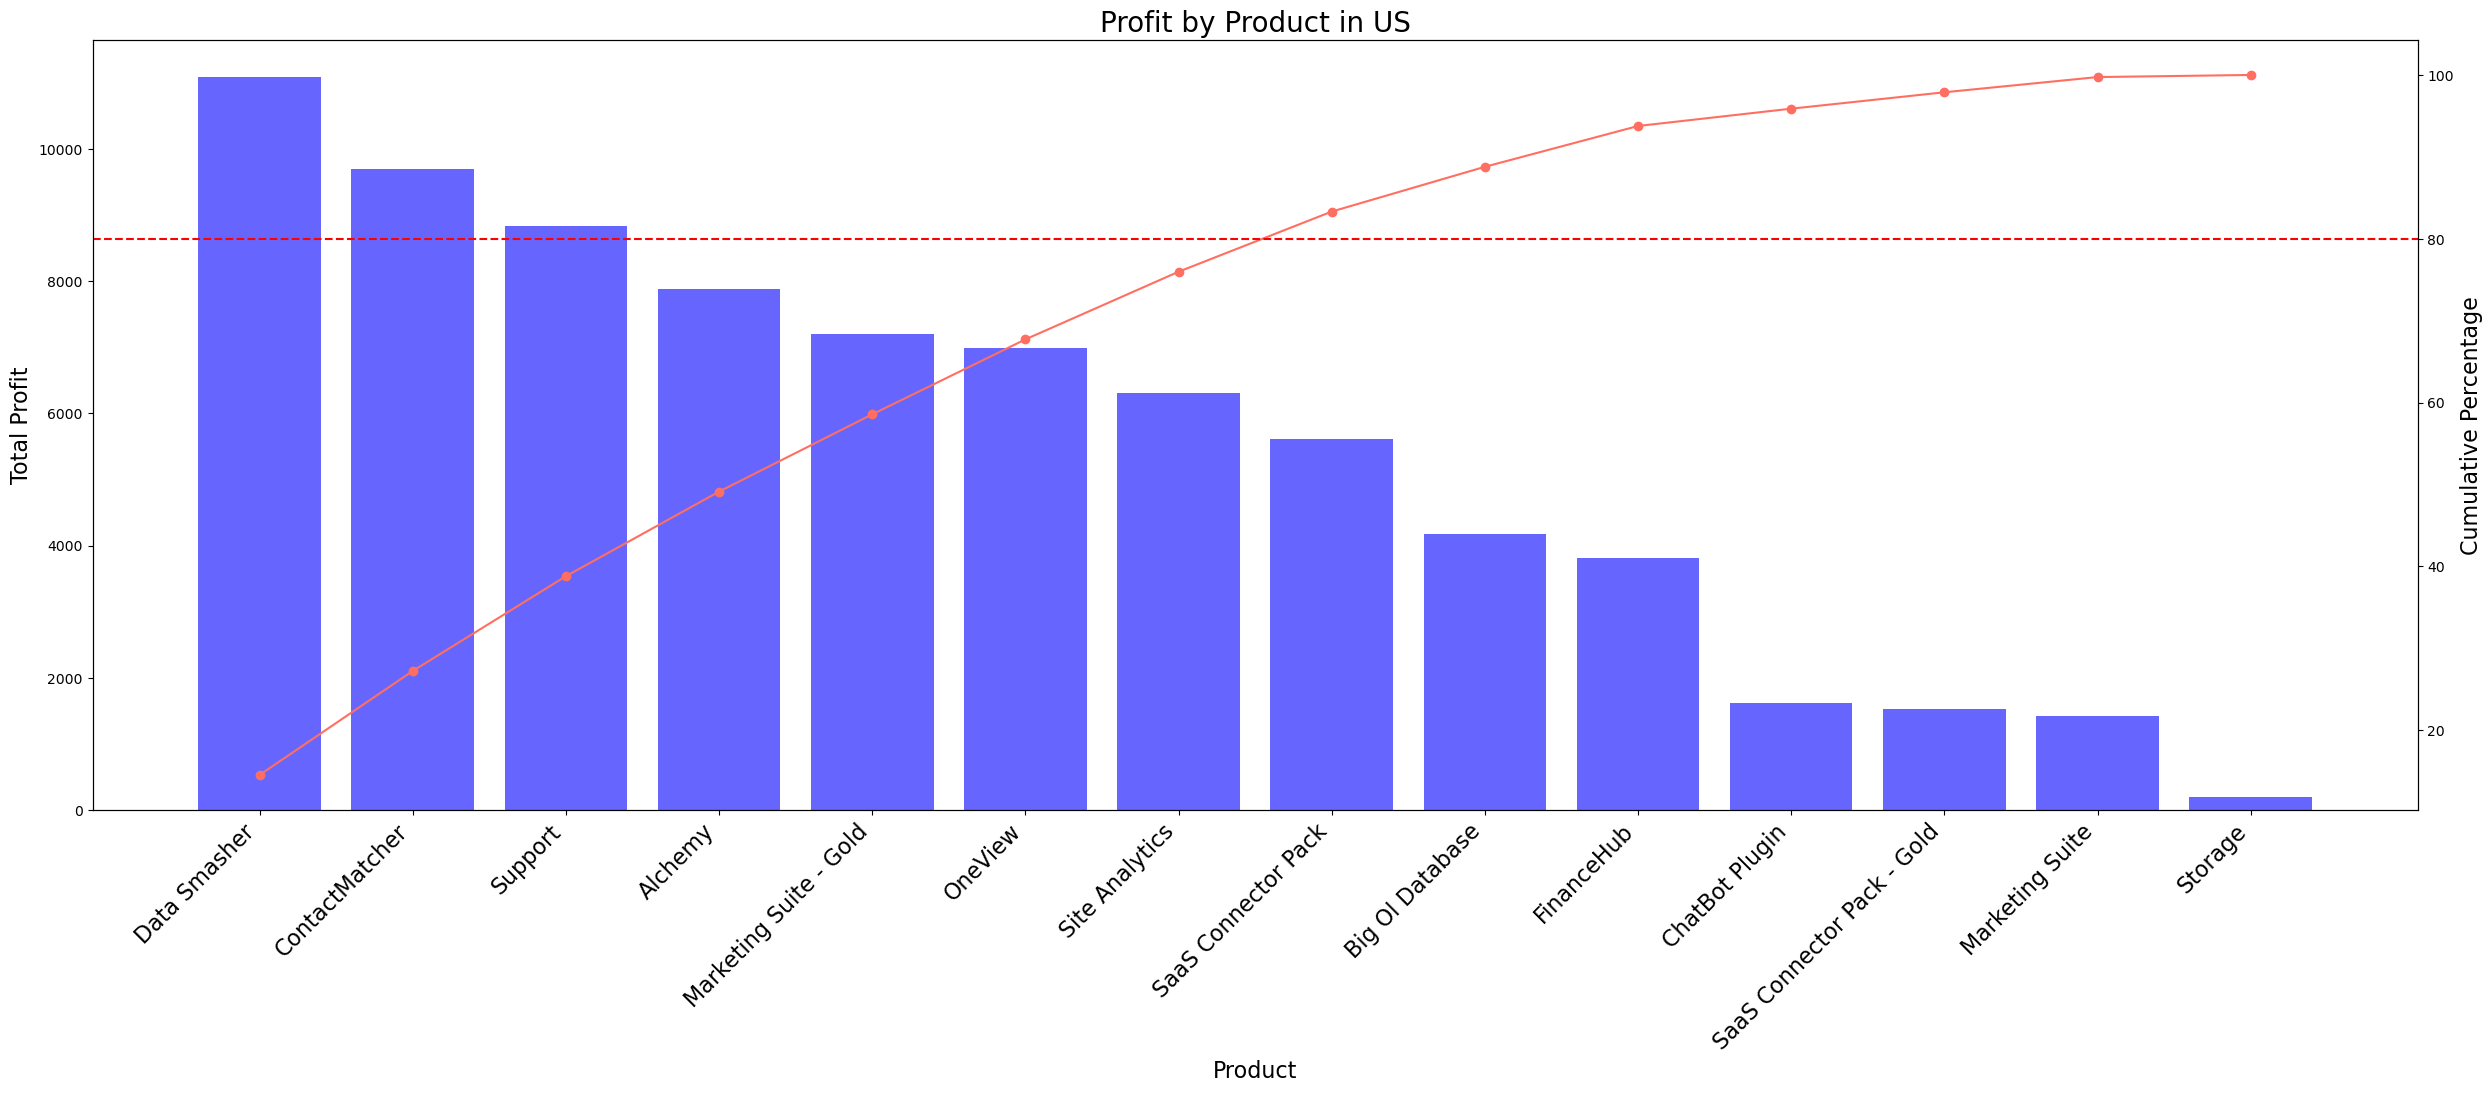

In [466]:
pareto_profit_chart("US")

#### **Insight:**

- **ContactMatcher** memiliki penjualan tinggi, tetapi profitnya relatif rendah, menunjukkan biaya operasional besar atau margin yang lebih kecil.
- **Alchemy**, yang sebelumnya tidak masuk dalam produk dengan penjualan tertinggi, ternyata memiliki profit tertinggi.
- Melakukan pengujian di pasar US terbukti benar.
- Perlu dilakukan evaluasi profit untuk produk dengan penjualan tinggi tapi profit rendah untuk melihat apakah ada masalah dalam harga, biaya, atau diskon yang diberikan.
- Produk dengan kontribusi rendah terhadap penjualan dan profit bisa dianalisis lebih lanjut untuk dipertimbangkan penghapusan atau optimasi strategi penjualannya.

Lakukan analisa terhadap `Discount`

---



### A4. Melakukan analisa `Discount`.

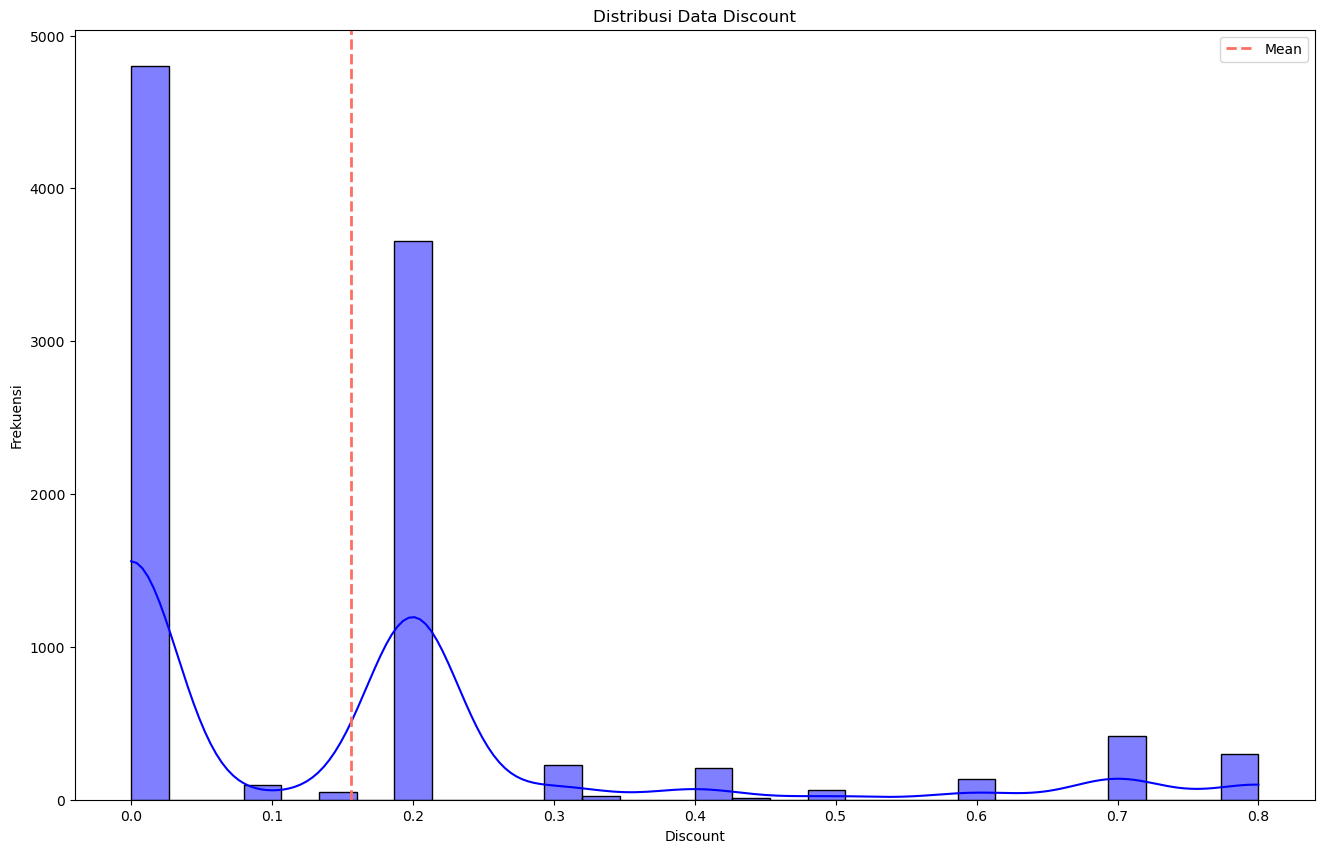

In [467]:
#Melihat sebaran data (Right atau Left Skewd)
# Plot histogram dan KDE
plt.figure(figsize=(16,10))
sns.histplot(df_clean["Discount"], kde=True, bins=30, color="blue")

# Tambahkan garis tengah (mean)
plt.axvline(df_clean["Discount"].mean(), color='#FF6F61', linestyle='dashed', linewidth=2, label="Mean")

# Judul dan label
plt.title("Distribusi Data Discount")
plt.xlabel("Discount")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

**Analisa Pesebaran Discount menggunakan histogram dan KDE (Kernel Density Estimation)**
- Distribusi data tampak right-skewed (positif skewed) karena memiliki ekor panjang ke kanan.
- Ada dua puncak (bimodal distribution) yang signifikan, yaitu di sekitar 0.0 dan 0.2, Hal ini menunjukkan bahwa ada dua kelompok utama dalam data Discount.
- Garis merah (Mean) berada di sekitar 0.15-0.2, tetapi distribusi lebih terkonsentrasi di sekitar 0.0 dan 0.2.

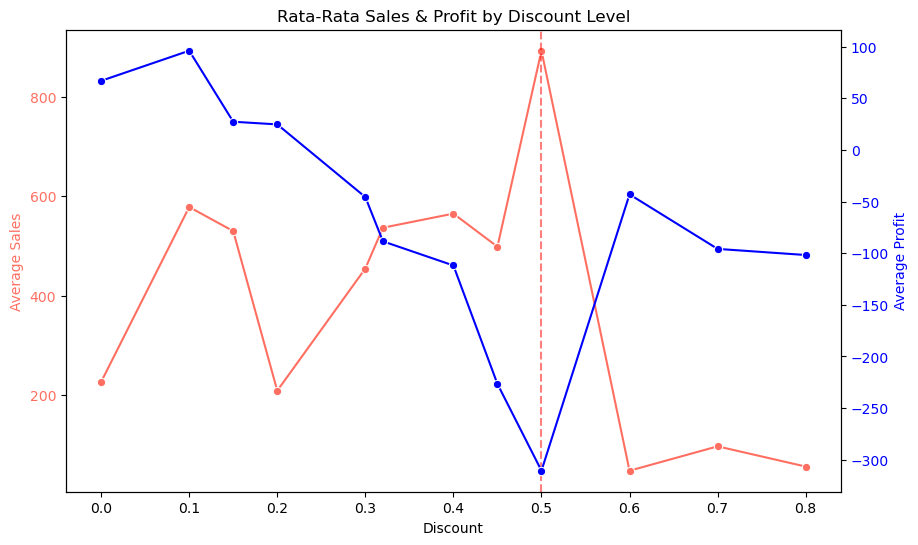

In [468]:
# Menghitung rata-rata sales dan profit berdasarkan discount
discount_sales = df_clean.groupby('Discount')[['Sales', 'Profit']].mean().reset_index()

# Membuat figure dan axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Sales (sumbu Y kiri)
ax1.set_xlabel("Discount")
ax1.set_ylabel("Average Sales", color="#FF6F61")
sns.lineplot(x=discount_sales['Discount'], y=discount_sales['Sales'], marker='o', ax=ax1, color="#FF6F61")
ax1.tick_params(axis='y', labelcolor="#FF6F61")

# Membuat sumbu Y kedua untuk Average Profit
ax2 = ax1.twinx()
ax2.set_ylabel("Average Profit", color="blue")
sns.lineplot(x=discount_sales['Discount'], y=discount_sales['Profit'], marker='o', ax=ax2, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Garis vertikal untuk diskon 0.5 (50%)
ax1.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='50% Discount Threshold')


# Menambahkan judul
plt.title("Rata-Rata Sales & Profit by Discount Level")

# Menampilkan plot
plt.show()

**Analisis Grafik Rata-Rata Sales & Profit by Discount Level**

- Rata-rata Sales:
    + Tingkat Diskon Rendah (0.0 - 0.2): Rata-rata sales meningkat.
    + Tingkat Diskon Sedang (0.5): Terjadi penurunan tajam dalam rata-rata sales.

- Rata-rata Profit:
    + Tingkat Diskon di atas 0.4: Rata-rata profit juga menunjukkan penurunan yang signifikan, bahkan menjadi negatif.

Diskon di atas 0.5 tampaknya merugikan, menyebabkan penurunan baik dalam sales maupun profit. Diskon yang lebih rendah mungkin lebih efektif untuk meningkatkan penjualan.

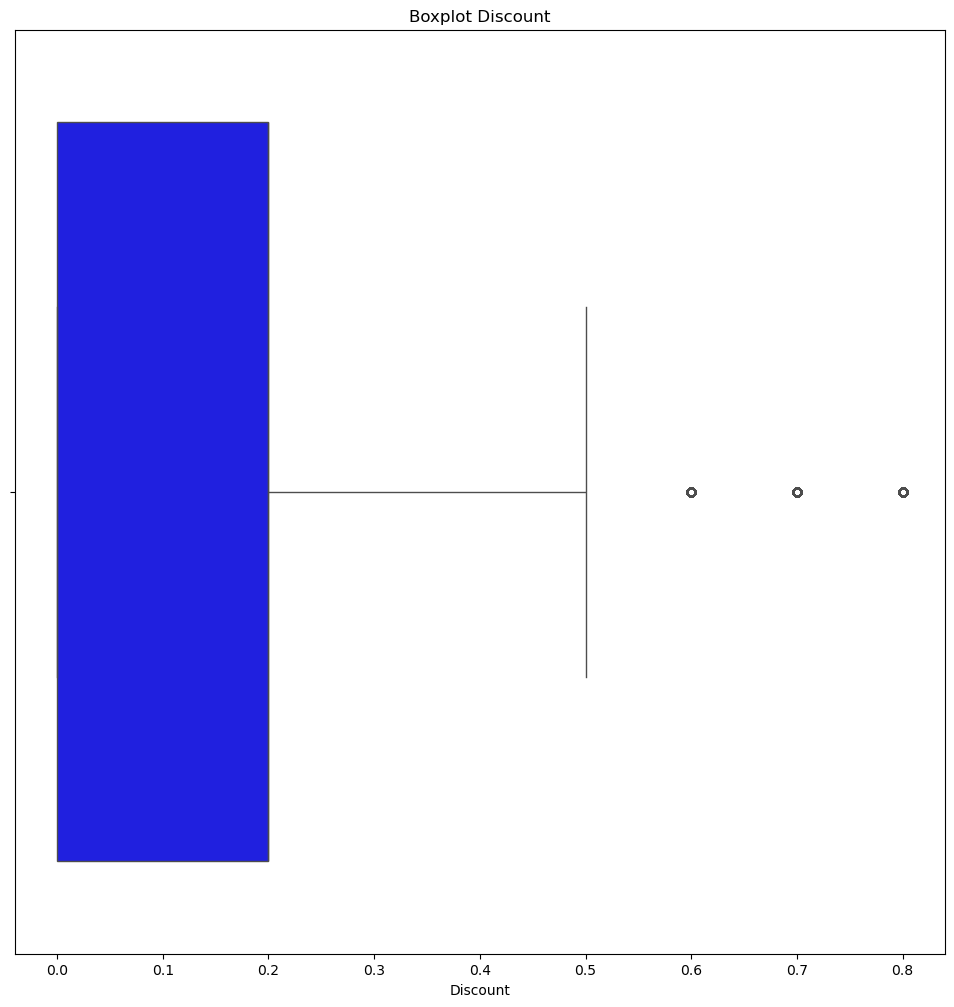

In [469]:
# Membuat boxplot
plt.figure(figsize=(12, 12))
sns.boxplot(x=df_clean["Discount"], color='blue')

# Menampilkan plot
plt.title("Boxplot Discount")
plt.show()

**Analisa Boxplot Discount**
- Sebagian besar data diskon berada dalam rentang 0 hingga sekitar 0.5, dengan beberapa nilai di atas 0.6 yang dianggap sebagai outlier.
- Whisker atas mencapai sekitar 0.5, menunjukkan bahwa mayoritas nilai diskon berada di bawah angka ini.

Dikarenakan Diskon di atas 0.4 mengalami penurunan secara profit, maka kita akan mencari data yang berada di rentang diskon 0.4 sampai diskon teratas, yaitu 0.8

In [470]:
# Menemukan data dalam whisker atas dan outlier

# Menghitung Q1, Q3, dan IQR
Q1 = df_clean['Discount'].quantile(0.25)  
Q3 = df_clean['Discount'].quantile(0.75)  
IQR = Q3 - Q1  

# Mendefinisikan batas untuk outlier
upper_bound = Q3 + 1.5 * IQR

whislier = df_clean[(df_clean['Discount'] > Q3) | (df_clean['Discount'] > upper_bound)]
whislier

,Order Date,Date Key,Contact Name,Country,Country Code,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year
3,2021-10-11,20211011,Zoe Hodges,Germany,DE,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021
14,2021-11-22,20211122,Emily Morrison,Japan,JP,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,68.8100,5,0.80,-123.8580,2021
15,2021-11-22,20211122,Emily Morrison,Japan,JP,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,2.5440,3,0.80,-3.8160,2021
23,2023-07-17,20230717,Luke Bower,France,FR,Paris,EMEA,EU-WEST,Costco Wholesale,1025,Retail,SMB,FinanceHub,71.3720,2,0.30,-1.0196,2023
27,2021-09-17,20210917,Neil Gill,France,FR,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,3083.4300,7,0.50,-1665.0522,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,2020-11-12,20201112,Brian Dickens,Japan,JP,Kyoto,APJ,JAPN,Siemens,1043,Manufacturing,SMB,SaaS Connector Pack,25.1280,3,0.60,-6.9102,2020
9919,2022-03-16,20220316,Pippa Edmunds,Japan,JP,Hiroshima,APJ,JAPN,BNP Paribas,1065,Finance,Strategic,FinanceHub,528.4300,5,0.30,-143.4310,2022
9920,2022-03-16,20220316,Pippa Edmunds,Japan,JP,Hiroshima,APJ,JAPN,BNP Paribas,1065,Finance,Strategic,ContactMatcher,22.3860,7,0.80,-35.8176,2022
9921,2020-11-24,20201124,Samantha Piper,Mexico,MX,Guadalajara,AMER,LATAM,Fannie Mae,1035,Finance,Enterprise,ContactMatcher,5.7420,3,0.70,-4.5936,2020


In [471]:
# Mengelompokkan data whisker atas (q3-q4) dan outlier discount berdasarkan produk
products_discount = whislier.groupby("Product")["Discount"].agg(["count", "unique"]).reset_index().sort_values(by="count", ascending=False)

products_discount.rename(columns={"count": "Jumlah Transaksi by Discount", "unique": "Jenis Discounts"}, inplace=True)
products_discount = products_discount.astype({"Product": object})
products_discount

,Product,Jumlah Transaksi by Discount,Jenis Discounts
3,ContactMatcher,789,"[0.45, 0.8, 0.7, 0.5, 0.3, 0.4]"
5,FinanceHub,158,[0.3]
9,SaaS Connector Pack,138,[0.6]
11,Site Analytics,109,[0.4]
6,Marketing Suite,70,"[0.5, 0.32, 0.7, 0.3]"
8,OneView,67,[0.8]
1,Big Ol Database,53,"[0.4, 0.7, 0.3, 0.5]"
0,Alchemy,9,[0.4]
2,ChatBot Plugin,0,[]
4,Data Smasher,0,[]


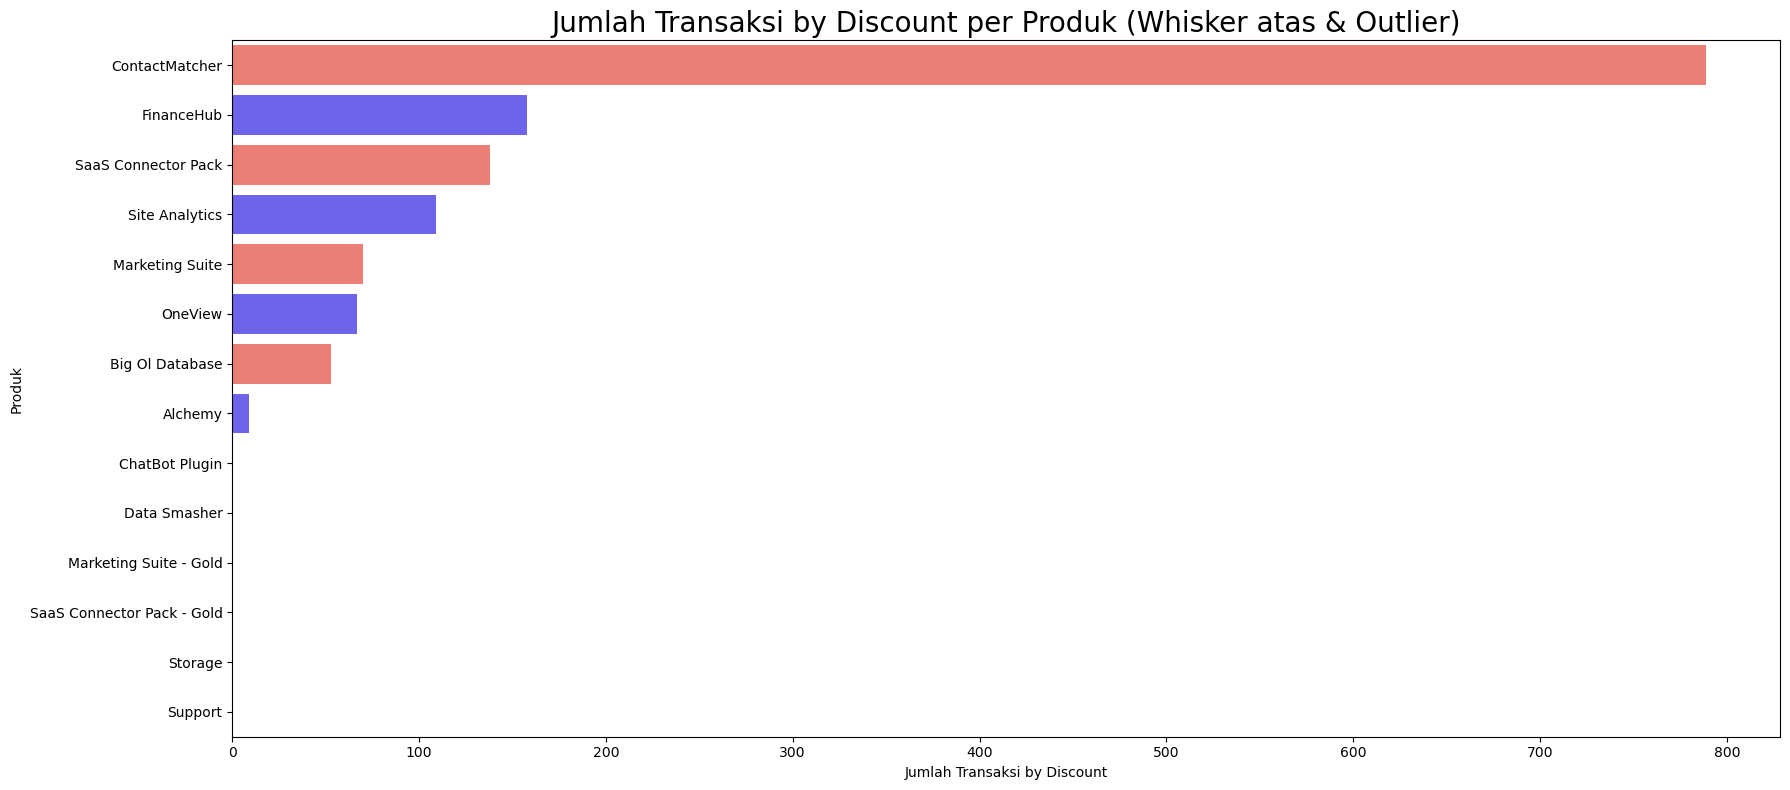

In [472]:
xcloud_palette = ["#FF6F61", "#5A4EFF"]
sns.set_palette(sns.color_palette(xcloud_palette))


# Membuat barplot
plt.figure(figsize=(18, 8))
sns.barplot(data=products_discount, y='Product', x='Jumlah Transaksi by Discount', palette = xcloud_palette)

# Menambahkan judul dan label
plt.title('Jumlah Transaksi by Discount per Produk (Whisker atas & Outlier)',fontsize=20)
plt.ylabel('Produk')
plt.xlabel('Jumlah Transaksi by Discount')

# Menampilkan plot
plt.tight_layout()
plt.show()

### **Insight Analisa Data Penjualan:**

**`Sales` vs. `Profit` → Apakah penjualan tinggi selalu menghasilkan profit tinggi?**
- Analisis menunjukkan bahwa tingginya penjualan tidak selalu berbanding lurus dengan profit. Kemungkinan besar, pemberian diskon yang tinggi memainkan peran penting dalam menekan profitabilitas.

**`Sales` vs. `Discount` → Apakah diskon benar-benar meningkatkan penjualan?**
- Rata-rata penjualan meningkat pada tingkat diskon rendah (0.0 hingga 0.2), dengan puncaknya di sekitar diskon 0.2. Namun, ketika diskon mencapai 0.5, setelah itu terjadi penurunan penjualan, yang mengindikasikan bahwa diskon yang lebih tinggi tidak selalu mendorong peningkatan penjualan.

**`Discount` vs. `Profit` → Seberapa besar diskon mengurangi keuntungan?**
- Diskon memiliki dampak signifikan terhadap profit, terutama ketika berada di atas 40%, yang secara drastis menurunkan keuntungan dan bahkan berpotensi menyebabkan profit negatif.

**Dominasi Produk `ContactMatcher`**
- Produk ContactMatcher menerima diskon tertinggi dibandingkan produk lain, dengan lebih dari 700 transaksi.
- Banyaknya transaksi dengan diskon besar menunjukkan bahwa strategi harga produk ini mungkin perlu dievaluasi lebih lanjut.
- Sejalan dengan Insight **A3**, tingginya jumlah Sales pada produk ini tidak berbanding lurus dengan Profit, yang semakin menguatkan pengaruh negatif diskon besar terhadap keuntungan.

Jika diskon di atas 40% menyebabkan profit negatif, maka kebijakan diskon perlu dievaluasi kembali untuk menghindari dampak buruk terhadap pendapatan perusahaan.

**Langkah Selanjutnya:**
Analisa `Customer` yang Mendapatkan Diskon
Untuk memahami lebih lanjut dampak diskon terhadap profitabilitas, perlu dianalisis lebih dalam mengenai customer yang paling sering menerima diskon tinggi. Hal ini akan membantu menentukan apakah diskon diberikan kepada pelanggan yang benar-benar bernilai tinggi bagi bisnis atau justru merugikan.

---

## **B. Analisa  Industri, Customer, dan Pengaruh Diskon terhadap Profit**
Dalam analisis data penjualan, Sales dan Profit tidak selalu sejalan karena dipengaruhi oleh discount. Langkah awal adalah menganalisis industri untuk melihat sektor yang paling terdampak oleh diskon dan profit rendah. Dari sini, kita dapat mengidentifikasi customer yang paling berpengaruh terhadap sales dan profit, serta yang paling sering menerima diskon. Evaluasi ini juga membantu menentukan produk yang perlu ditinjau ulang agar strategi harga lebih efektif. Dengan memahami industri lebih dalam, kita bisa melihat customer mana yang perlu diperhatikan lebih detail dan apakah diskon yang diberikan benar-benar menguntungkan.

- `Industry` vs. `Transaksi` → Industri mana yang memiliki jumlah transaksi tertinggi dan terendah?
- `Industry` vs. `Sales` & `Profit` → Industri mana yang memiliki sales tinggi tetapi profit rendah? Apakah ada pola kejanggalan yang menunjukkan dampak negatif dari diskon besar?
- `Customer` vs. `Produk` → Customer yang sering mendapatkan diskon tinggi lebih banyak membeli produk apa? Apakah produk tersebut memiliki profit rendah, dan apakah strategi harga perlu dievaluasi?

### B1.  Melihat transaksi `Industry` yang memberikan dampak terhadap `Profit` maupun `Sales`.

In [473]:
# Menghitung jumlah transaksi per industry
industry_transaksi = df_clean["Industry"].value_counts().reset_index()
industry_transaksi.columns = ["Industry", "Jumlah Transaksi"]

# Mengurutkan berdasarkan jumlah transaksi terbanyak
industry_transaksi = industry_transaksi.sort_values(by="Jumlah Transaksi", ascending=False)
industry_transaksi = industry_transaksi.astype({"Industry": object})
industry_transaksi

,Industry,Jumlah Transaksi
0,Finance,2127
1,Energy,1316
2,Tech,1236
3,Manufacturing,1222
4,Healthcare,1049
5,Consumer Products,1021
6,Retail,972
7,Communications,593
8,Transportation,351
9,Misc,107


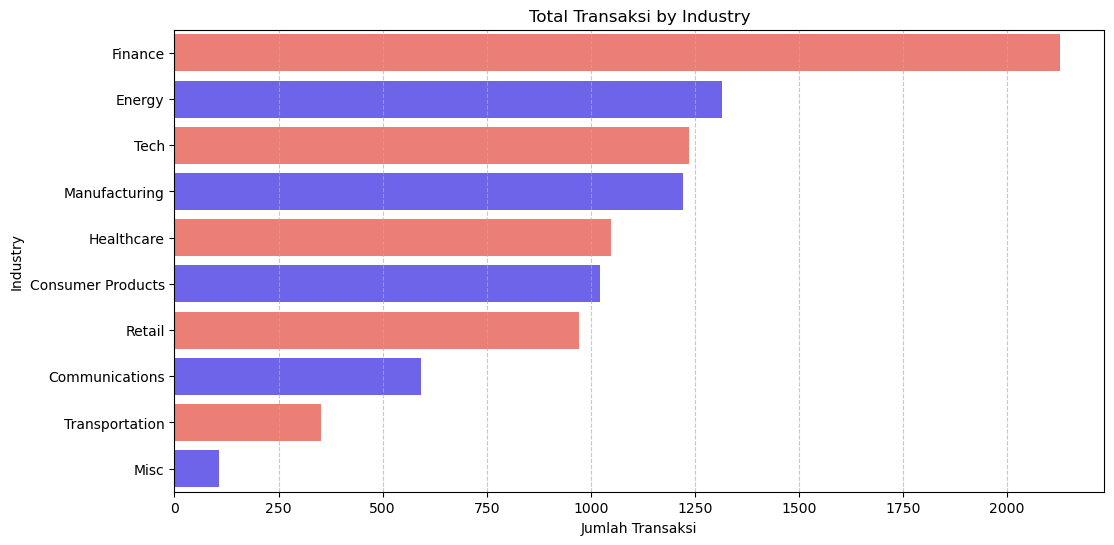

In [474]:
# Plot visualisasi dengan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Jumlah Transaksi', y='Industry', data=industry_transaksi, palette = xcloud_palette)

# Tambahkan label
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Industry')
plt.title('Total Transaksi by Industry')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

**Analisa Total Transaksi by Industry:**
- Finance adalah industri dengan jumlah transaksi tertinggi, jauh lebih tinggi dari industri lain.
- Tech dan Manufacturing juga memiliki jumlah transaksi yang tinggi. Menempati urutan ke 3 dan ke 4 dari urutan transaksi terbanyak.
- Transportation dan Misc memiliki jumlah transaksi yang relatif kecil


In [475]:
# Menghitung total sales per industri
industry_sales = df_clean.groupby("Industry")["Sales"].sum().reset_index()
industry_sales = industry_sales.sort_values(by="Sales", ascending=False)

# Menghitung total profit per industri
industry_profit = df_clean.groupby("Industry")["Profit"].sum().reset_index()
industry_profit = industry_profit.sort_values(by="Profit", ascending=False)

# Menampilkan hasil
display(industry_sales,industry_profit)

,Industry,Sales
3,Finance,474150.4844
2,Energy,304644.1409
5,Manufacturing,295192.3812
4,Healthcare,273183.2882
8,Tech,263169.0277
1,Consumer Products,224044.1422
7,Retail,223072.0720
0,Communications,120962.2365
9,Transportation,90191.3276
6,Misc,28591.7596


,Industry,Profit
3,Finance,50348.9696
2,Energy,45282.3137
5,Manufacturing,38413.1064
1,Consumer Products,37018.0077
4,Healthcare,31969.0932
7,Retail,30207.8208
8,Tech,24615.0436
0,Communications,13976.3410
9,Transportation,7402.6967
6,Misc,7163.6290


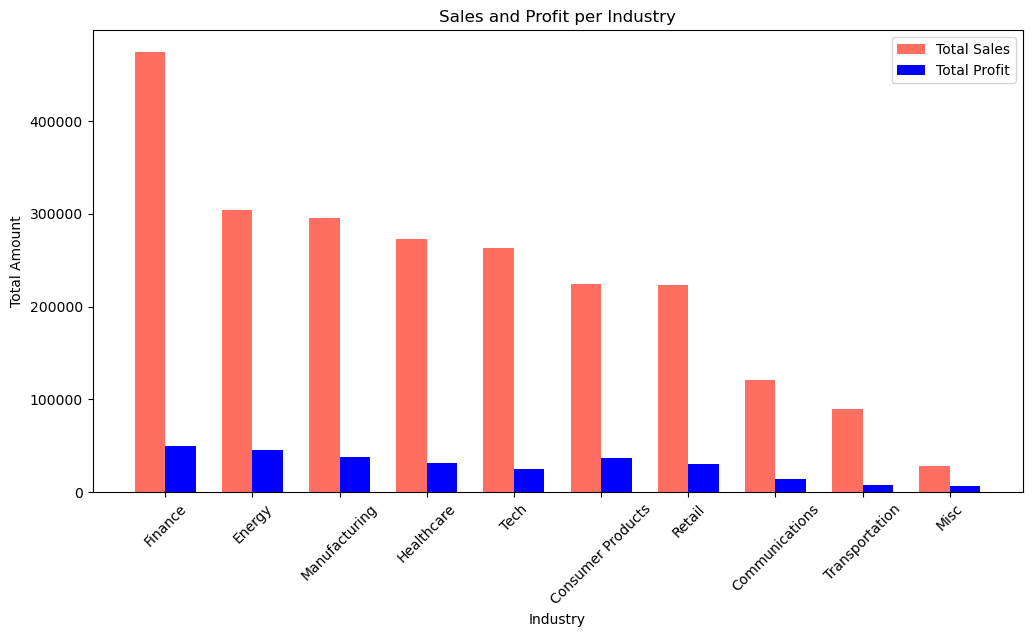

In [476]:
# Menggabungkan DataFrame
industry_sales_profit = pd.merge(industry_sales, industry_profit, on='Industry')

# Menyiapkan posisi untuk bar
x = np.arange(len(industry_sales_profit['Industry']))  # posisi label x
width = 0.35  # lebar tiap bar

# Membuat plot
plt.figure(figsize=(12, 6))

# Bar untuk Sales
plt.bar(x - width/2, industry_sales_profit['Sales'], width, label='Total Sales', color='#FF6F61')

# Bar untuk Profit
plt.bar(x + width/2, industry_sales_profit['Profit'], width, label='Total Profit', color='blue')

# Menambahkan label dan judul
plt.xlabel('Industry')
plt.ylabel('Total Amount')
plt.title('Sales and Profit per Industry')
plt.xticks(x, industry_sales_profit['Industry'], rotation=45)
plt.legend()


#### **Insight:**

- Finance adalah industri dominan, baik dalam total sales maupun jumlah transaksi.
- Tech dan Manufacturing memiliki jumlah transaksi yang tinggi, tetapi total sales mereka tidak setinggi industri lain seperti Finance atau Energy.
- Beberapa industri memiliki sales besar tetapi jumlah transaksi yang tidak terlalu tinggi, menunjukkan kemungkinan harga per transaksi yang lebih tinggi.
- Profit tidak selalu berbanding lurus dengan sales, karena ada industri yang memiliki sales besar tetapi profit margin yang lebih kecil.

Lakukan analisa lebih dalam untuk `Industry` `Tech`, karena ditemukan kejanggalan terhadap nilai profit. Apakah dipengaruhi oleh Discount?

### B2.Menemukan `Product` berdasarkan `Industry` yang dipengaruhi oleh `Discount`
Menurut **Analisa Hubungan Sales, Discount, dan Profit**, diskon di atas 40% sering kali mengurangi profit hingga menyebabkan kerugian. Meski dapat meningkatkan penjualan, hasil akhirnya justru berdampak negatif pada profitabilitas. Industri Tech mencatat jumlah transaksi yang tinggi, namun profit tetap rendah, menunjukkan bahwa strategi diskon agresif tidak selalu efektif dalam meningkatkan keuntungan.

In [477]:
# Menghitung transaksi setiap Industry dengan diskon di atas 40%
Industry_discount_count = df_clean[df_clean["Discount"] >= 0.4].groupby("Industry")["Discount"].count().reset_index()
Industry_discount_count = Industry_discount_count.sort_values(by="Discount", ascending=False)

Industry_discount_count = Industry_discount_count.astype({"Industry": object})

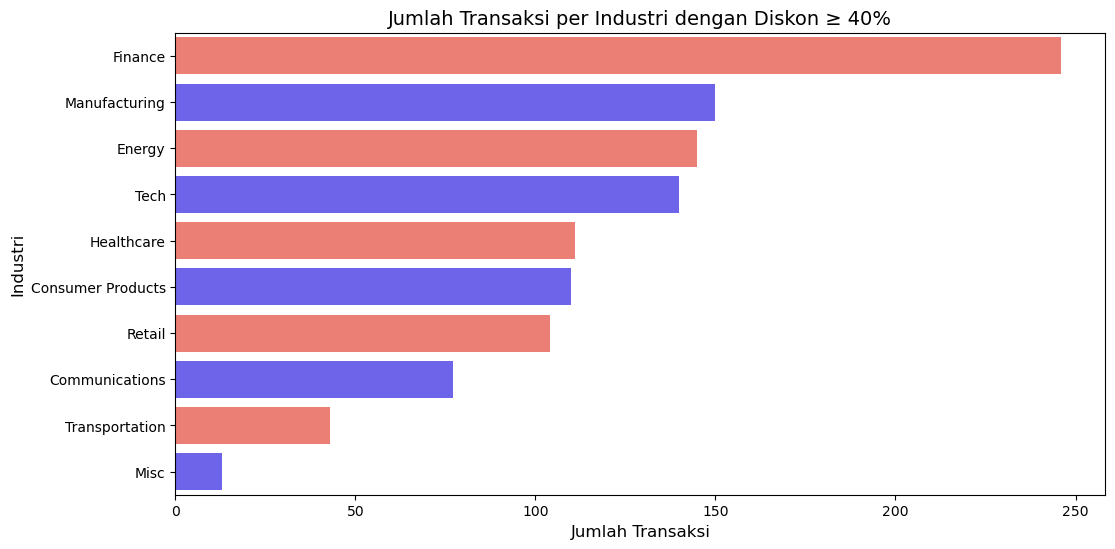

In [478]:
plt.figure(figsize=(12, 6))

# Membuat barplot dari Industry_discount_count
sns.barplot(x="Discount", y="Industry", data=Industry_discount_count, palette=xcloud_palette)
plt.title("Jumlah Transaksi per Industri dengan Diskon ≥ 40%", fontsize=14)
plt.xlabel("Jumlah Transaksi", fontsize=12)
plt.ylabel("Industri", fontsize=12)

plt.show()

- Tabel diatas menunjukkan jumlah total diskon yang diberikan di berbagai industri. Finance memiliki total diskon tertinggi, diikuti oleh Manufacturing, Energy, dan Tech. 
- Industri Tech, yang memiliki jumlah transaksi tertinggi tetapi profit rendah, juga termasuk dalam daftar industri dengan diskon besar (140 total diskon). 
- Hal ini memperkuat temuan sebelumnya bahwa diskon tinggi, terutama di atas 40%, dapat meningkatkan penjualan tetapi merugikan profitabilitas.

Lakukan analisa lebih dalam pada `Industry` `Tech`

In [479]:
#Melakukan pengambilan data pada Industry Tech
df_tech = df_clean[df_clean['Industry'] == 'Tech']
df_tech.head()

,Order Date,Date Key,Contact Name,Country,Country Code,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year
13,2022-12-06,20221206,Adrian Abraham,Canada,CA,Toronto,AMER,NAMER,Microsoft,1066,Tech,SMB,ContactMatcher,407.976,3,0.2,132.5922,2022
27,2021-09-17,20210917,Neil Gill,France,FR,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,3083.430,7,0.5,-1665.0522,2021
28,2021-09-17,20210917,Neil Gill,France,FR,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,ContactMatcher,9.618,2,0.7,-7.0532,2021
29,2021-09-17,20210917,Neil Gill,France,FR,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,SaaS Connector Pack,124.200,3,0.2,15.5250,2021
30,2021-09-17,20210917,Neil Gill,France,FR,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,SaaS Connector Pack - Gold,3.264,2,0.2,1.1016,2021


---
**Dalam data Industry Tech kita akan mencoba melihat produk apa saja yang sering dilakukan transaksi**

---

In [480]:
product_tech = df_tech['Product'].value_counts().reset_index()
product_tech = product_tech.astype({"Product": object})

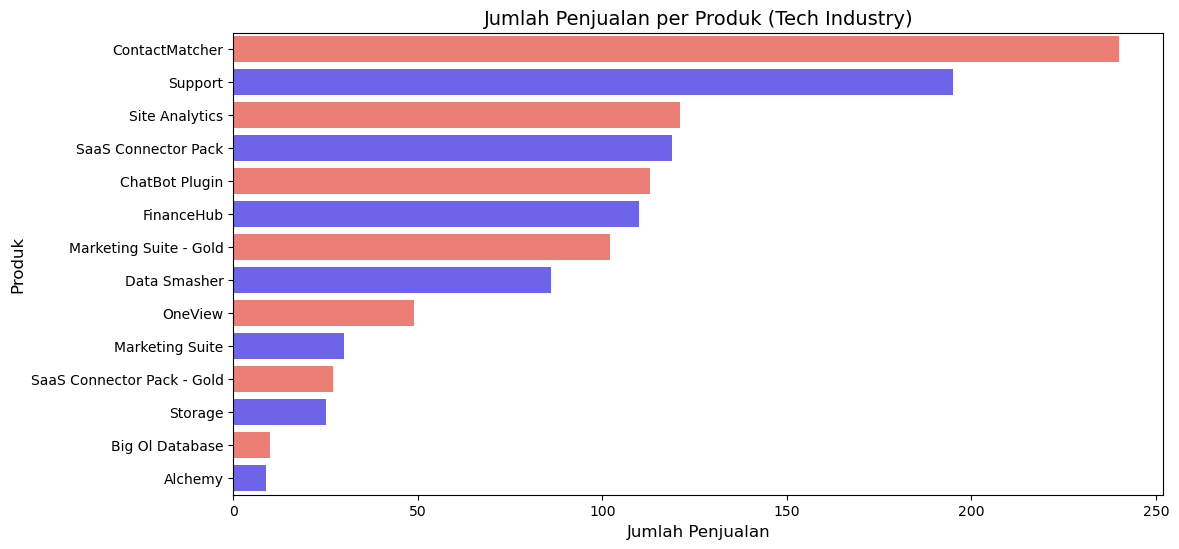

In [481]:
plt.figure(figsize=(12, 6))

# Membuat barplot dari product_tech
sns.barplot(x="count", y="Product", data=product_tech, palette=xcloud_palette)

# Menambahkan judul dan label
plt.title("Jumlah Penjualan per Produk (Tech Industry)", fontsize=14)
plt.xlabel("Jumlah Penjualan", fontsize=12)
plt.ylabel("Produk", fontsize=12)

# Menampilkan plot
plt.show()

Kita melihat bahwa Product ContactMatcher masih mendominasi dalam jumlah transaksi, menunjukkan bahwa produk ini memiliki tingkat penggunaan yang tinggi di industri Tech. Hal ini juga sejalan dengan data keseluruhan yang menunjukkan bahwa sales terhadap Product ContactMatcher berada di posisi teratas.

In [482]:
df_tech_profit = df_tech.groupby("Product")["Profit"].sum().reset_index().sort_values(by="Profit", ascending=False)
df_tech_sales = df_tech.groupby("Product")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
display(df_tech_profit,df_tech_sales)

,Product,Profit
11,Site Analytics,5810.7933
4,Data Smasher,4780.8687
13,Support,4435.0565
0,Alchemy,3428.9300
5,FinanceHub,3230.0484
7,Marketing Suite - Gold,2686.8394
9,SaaS Connector Pack,1399.3957
8,OneView,1102.4136
2,ChatBot Plugin,853.2577
10,SaaS Connector Pack - Gold,546.8233


,Product,Sales
3,ContactMatcher,53833.6275
11,Site Analytics,42458.6440
5,FinanceHub,34317.8740
7,Marketing Suite - Gold,29333.6040
6,Marketing Suite,22592.5122
4,Data Smasher,18250.8960
13,Support,14792.9700
0,Alchemy,12019.7460
1,Big Ol Database,10998.0680
9,SaaS Connector Pack,10089.7080


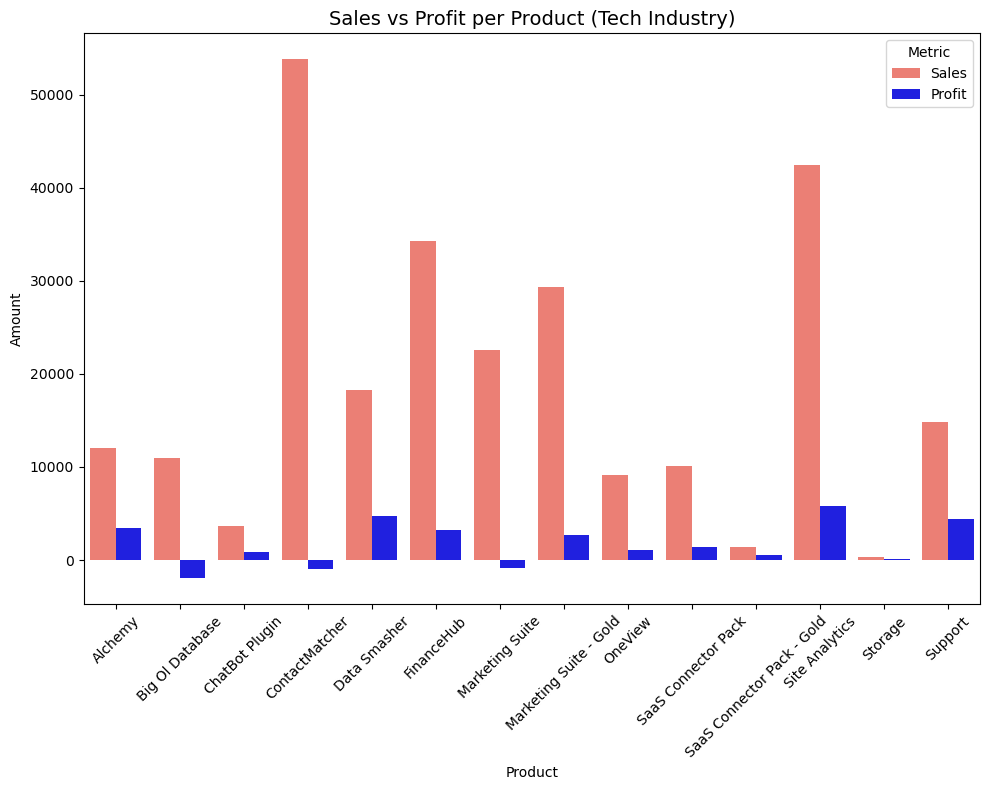

In [483]:
# Gabungkan data sales dan profit
df_tech_combine = df_tech_profit.merge(df_tech_sales, on="Product")

# Ubah dari format wide ke long agar bisa pakai hue
df_melted = df_tech_combine.melt(id_vars='Product', value_vars=['Sales', 'Profit'],
                                 var_name='Metric', value_name='Amount')

# Plot side-by-side bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=df_melted, x='Product', y='Amount', hue='Metric', palette={'Sales': '#FF6F61', 'Profit': 'blue'})

# Tambahkan label dan judul
plt.ylabel('Amount')
plt.xlabel('Product')
plt.title('Sales vs Profit per Product (Tech Industry)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

Dalam analisis Sales dan Profit, terbukti bahwa Product ContactMatcher memiliki angka sales yang tinggi, yang menunjukkan bahwa permintaan terhadap produk ini cukup besar. Hal ini mencerminkan bahwa ContactMatcher memiliki daya tarik yang kuat di pasar serta menjadi pilihan utama bagi pelanggan.

Namun, meskipun memiliki sales yang tinggi, profitabilitas ContactMatcher justru sangat rendah, bahkan menempati posisi kedua terendah di antara semua produk. Hal ini mengindikasikan bahwa ada faktor lain yang mempengaruhi margin keuntungan produk ini, salah satunya bisa jadi adalah strategi diskon yang diterapkan.

---
**Analisis Diskon ≥40%**

---

In [484]:
# Menemukan Product yang mendapatkan Discount di atas 40%  di data df_tech
tech_product_discount_count = df_tech[df_tech["Discount"] >= 0.4].groupby("Product")["Discount"].count().reset_index()

# Mengurutkan berdasarkan jumlah transaksi diskon tertinggi
tech_product_discount_count = tech_product_discount_count.sort_values(by="Discount", ascending=False)

tech_product_discount_count = tech_product_discount_count.astype({"Product": object})

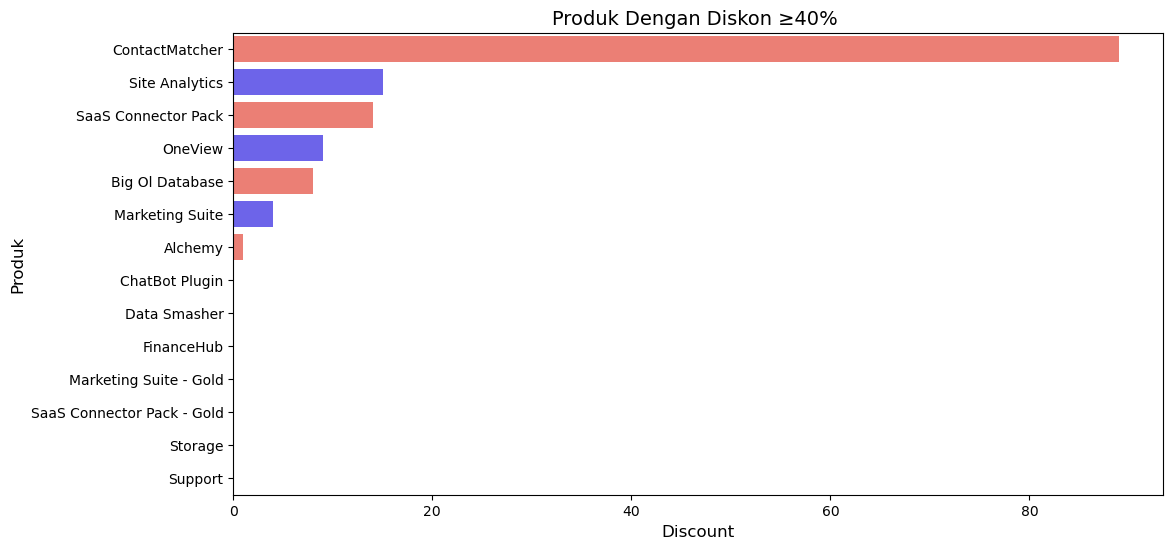

In [485]:
plt.figure(figsize=(12, 6))

sns.barplot(x="Discount", y="Product", data=tech_product_discount_count, palette=xcloud_palette)

plt.title("Produk Dengan Diskon ≥40% ", fontsize=14)
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Produk", fontsize=12)

plt.show()


Dengan melihat data Product pada Industry Tech yang mendapatkan Discount di atas 40%, terbukti bahwa Product ContactMatcher adalah product yang paling banyak mendapatkan diskon di atas 40%, temuan ini pun sesuai dengan data keseluruhan yang sudah kita analisa sebelumnya, bawah product ContactMatcher merupakan product yang sering mendapatkan discount di atas 40%.

Lakukan analisa pada data customer pada industry tech, untuk mengetahui product apa yang mereka sering beli,yang membuat nilai sales tinggi tetapi profit rendah dan tergolong negatif. apakah Discount mempengaruhi?

### B3.Menemukan `Customer` berdasarkan `Industry` yang dipengaruhi oleh `Discount`


In [486]:
df_tech_customer_sales = df_tech.groupby("Customer")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
df_tech_customer_profit = df_tech.groupby("Customer")["Profit"].sum().reset_index().sort_values(by="Profit", ascending=False)
display(df_tech_customer_sales,df_tech_customer_profit)


,Customer,Sales
7,Intel,26970.7510
3,Bosch,25444.9990
11,Samsung Electronics,23933.3290
1,Amazon,23189.2165
2,Apple,23069.4180
12,Sony,22780.1968
9,Oracle,21195.1780
4,Cisco Systems,19780.4660
5,HonHai Precision Industry,18457.4150
0,Alphabet,16116.4610


,Customer,Profit
0,Alphabet,3980.3457
2,Apple,3626.6249
4,Cisco Systems,3219.8450
11,Samsung Electronics,3078.6628
8,Microsoft,2501.4290
1,Amazon,2163.9843
6,Huawei,1984.0901
12,Sony,1812.1822
7,Intel,1725.5685
9,Oracle,1488.9293


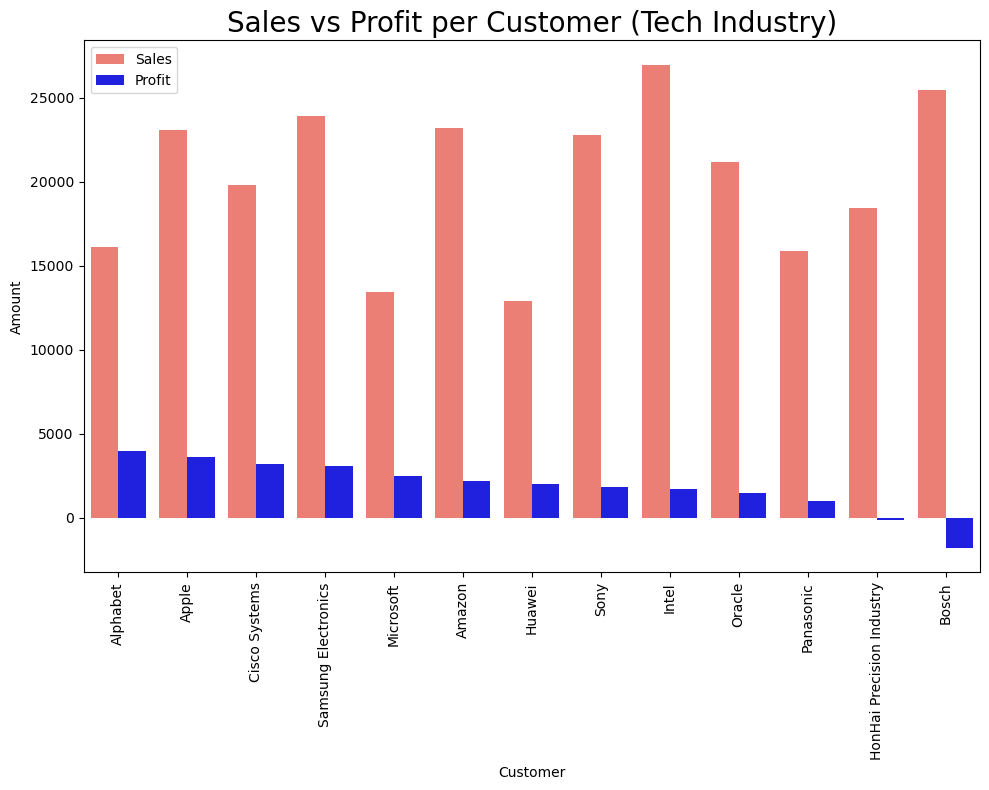

In [487]:
# Gabungkan data
df_tech_cust_combine = df_tech_customer_profit.merge(df_tech_customer_sales, on="Customer")

# Ubah dari wide ke long format
df_melted = df_tech_cust_combine.melt(id_vars="Customer", 
                                      value_vars=["Sales", "Profit"], 
                                      var_name="Metric", 
                                      value_name="Amount")

# Plot side-by-side bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=df_melted, x="Customer", y="Amount", hue="Metric",palette=["#FF6F61", "blue"])

plt.title("Sales vs Profit per Customer (Tech Industry)", fontsize=20)
plt.ylabel("Amount")
plt.xlabel("Customer")
plt.xticks(rotation=90)
plt.legend(title="")

plt.tight_layout()
plt.show()

Customer Bosch memiliki sales tinggi, tetapi profit negatif. Ini bisa disebabkan oleh diskon besar pada produk yang mereka beli.

Untuk memastikannya, kita akan melihat produk apa saja yang dibeli oleh Bosch dan seberapa besar diskon yang diberikan. Jika pola ini terbukti, strategi diskon perlu dievaluasi agar tetap mendorong penjualan tanpa merugikan profit.

In [488]:
# Memfilter hanya produk ContactMatcher berdasarkan customer Bosch
bosch_product = df_tech[df_tech["Customer"] == "Bosch"]

# Mengelompokkan berdasarkan customer dan menjumlahkan jumlah pembelian
bosch_product_quantity = bosch_product.groupby("Product")["Quantity"].sum().reset_index()

# Mengurutkan dari jumlah pembelian terbanyak
bosch_product_quantity = bosch_product_quantity.sort_values(by="Quantity", ascending=False)

bosch_product_quantity = bosch_product_quantity.astype({"Product": object})

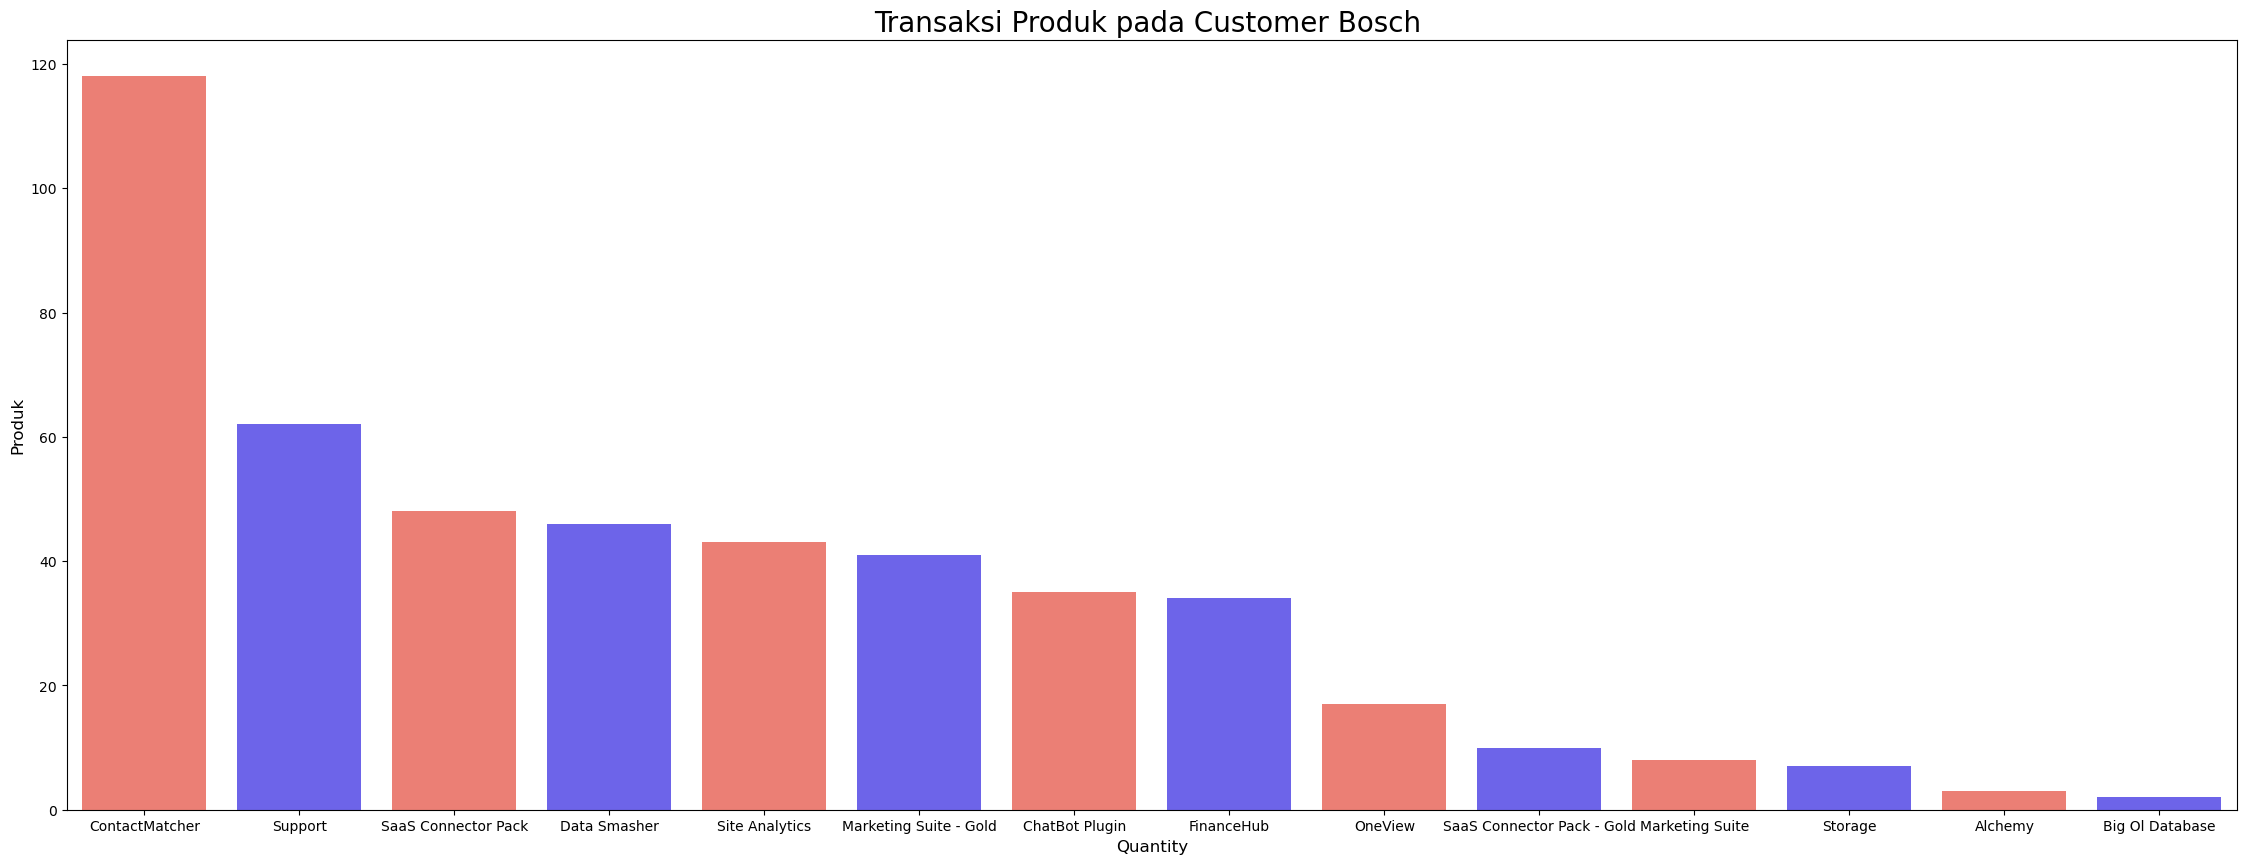

In [489]:
plt.figure(figsize=(28, 10))

sns.barplot(x="Product", y="Quantity", data=bosch_product_quantity, palette=xcloud_palette)

plt.title("Transaksi Produk pada Customer Bosch ", fontsize=20)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Produk", fontsize=12)

plt.show()

Product ContactMatcher adalah yang paling sering dibeli oleh Customer Bosch.

Selanjutnya, kita akan melihat apakah Bosch sering mendapatkan diskon besar, yang mungkin menjadi penyebab profit negatif?

In [490]:
# Menemukan Customer yang mendapatkan Discount di atas 40%  di data df_tech
customer_discount_count = df_tech[df_tech["Discount"] >= 0.4].groupby("Customer")["Discount"].count().reset_index()

# Mengurutkan berdasarkan jumlah transaksi diskon tertinggi
customer_discount_count = customer_discount_count.sort_values(by="Discount", ascending=False)

customer_discount_count

,Customer,Discount
3,Bosch,16
12,Sony,16
1,Amazon,15
11,Samsung Electronics,15
2,Apple,13
7,Intel,13
9,Oracle,12
4,Cisco Systems,9
5,HonHai Precision Industry,8
6,Huawei,8


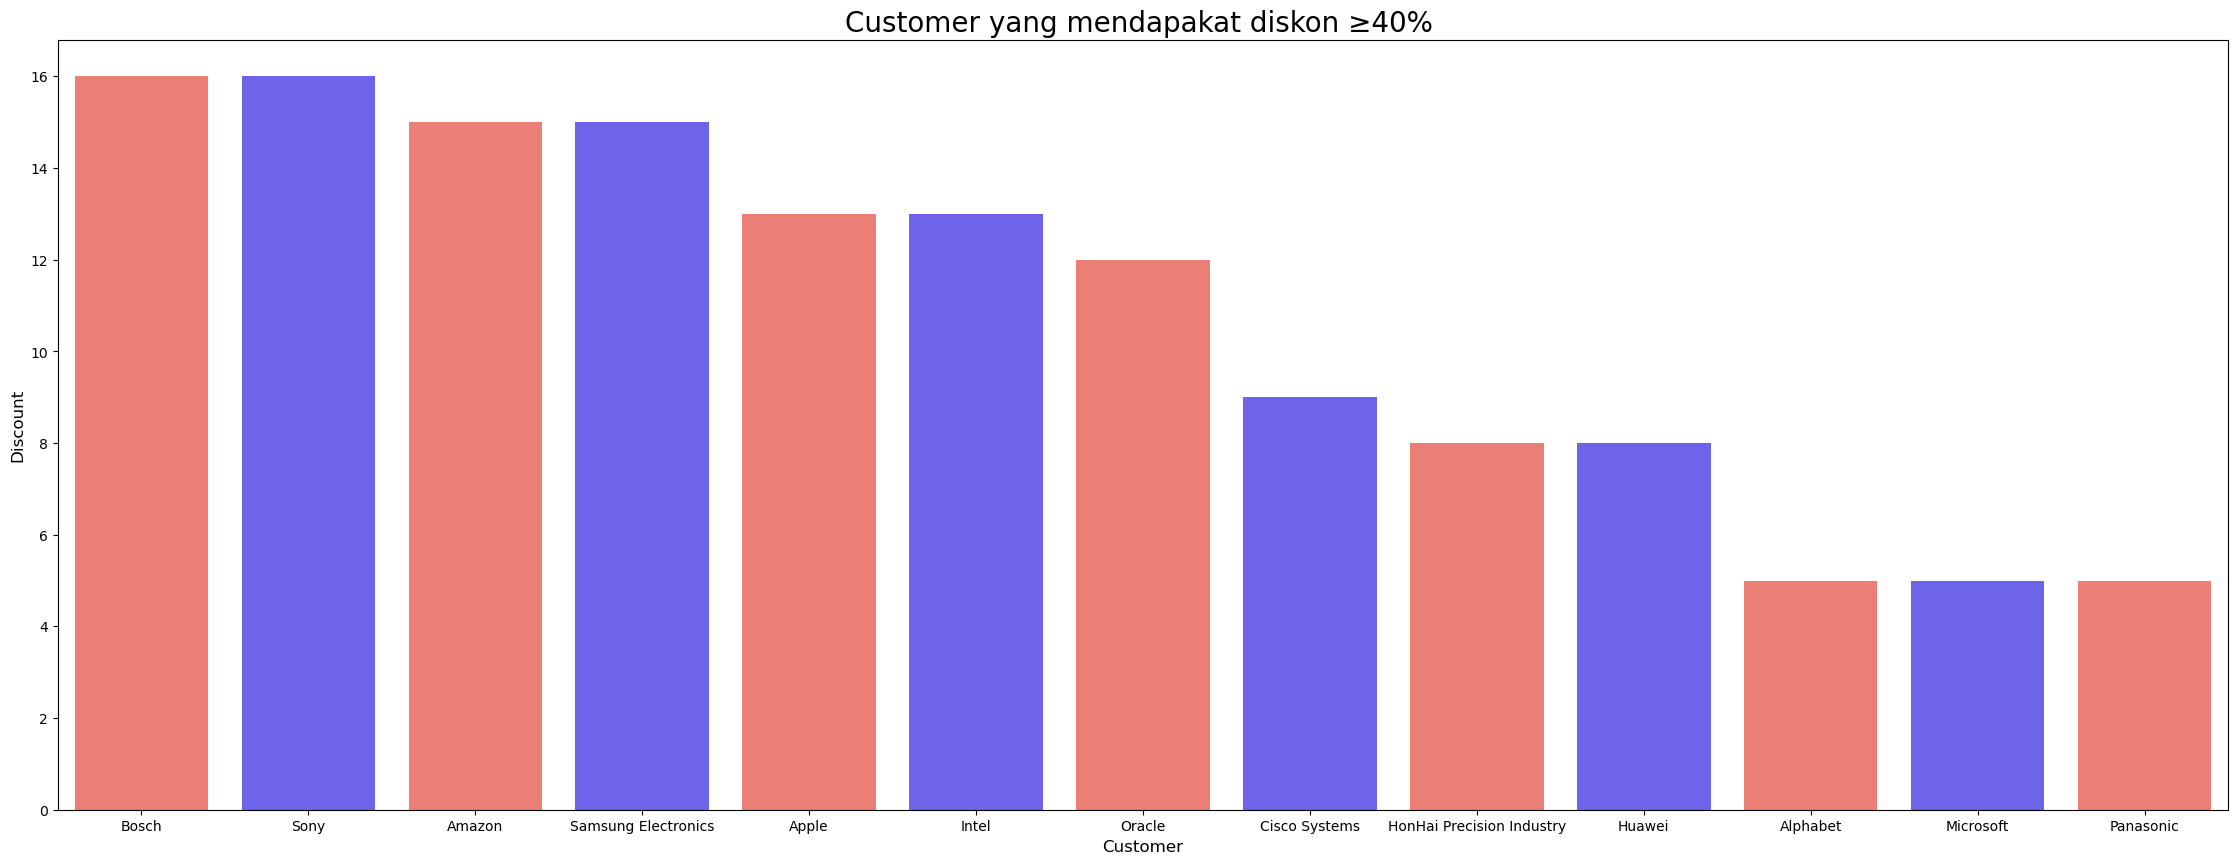

In [491]:
plt.figure(figsize=(28, 10))

sns.barplot(x="Customer", y="Discount", data=customer_discount_count, palette=xcloud_palette)

plt.title("Customer yang mendapakat diskon ≥40% ", fontsize=20)
plt.xlabel("Customer", fontsize=12)
plt.ylabel("Discount", fontsize=12)

plt.show()

Customer Bosch terbukti sering mendapatkan diskon tinggi.

Insight ini menunjukkan bahwa sales yang tinggi tidak selalu menghasilkan profit besar bagi perusahaan Xcloud. Selain itu, pemberian diskon tinggi perlu dievaluasi karena berdampak signifikan terhadap profitabilitas perusahaan.

### **Insight Analisa Data Customer:**
**`Industry` vs. `Transaksi` → Industri mana yang memiliki jumlah transaksi tertinggi dan terendah?**
- Finance adalah industri dengan jumlah sales tertinggi, jauh lebih tinggi dari industri lain.
- Tech dan Manufacturing juga memiliki jumlah transaksi yang tinggi. Menempati urutan ke 3 dan ke 4 dari urutan transaksi terbanyak.
- Transportation dan Misc memiliki jumlah transaksi yang relatif kecil.

**`Industry` vs. `Sales` & `Profit` → Industri mana yang memiliki sales tinggi tetapi profit rendah? Apakah ada pola kejanggalan yang menunjukkan dampak negatif dari diskon besar?**
- Finance adalah industri dominan, baik dalam total sales maupun jumlah transaksi.
- Industri Tech salah satu industri dari Top 5 yang memiliki sales yang tinggi, tetapi profit rendah dibanding industri yang memiliki sales yang lebih dikit,ini menunjukan industry tech ada kejanggalan dalam sales, dan ini terlihat dalam pemberian diskon yang banyak.

**`Customer` vs. `Produk` → Customer yang sering mendapatkan diskon tinggi lebih banyak membeli produk apa? Apakah produk tersebut memiliki profit rendah, dan apakah strategi harga perlu dievaluasi?**
- Customer Bosch memiliki sales tinggi, tetapi profit negatif. Ini bisa disebabkan oleh diskon besar pada produk yang mereka beli.
- Customer Bosch terbukti sering mendapatkan diskon tinggi.
- Diskon yang tinggi pada produk ContactMatcher menjadi penyebab profit negatif.
- Sales yang tinggi tidak selalu menghasilkan profit besar bagi perusahaan Xcloud.
- Pemberian diskon tinggi perlu dievaluasi karena berdampak signifikan terhadap profitabilitas perusahaan.

# **Kesimpulan Dan Rekomendasi**

### **Kesimpulan**

---

**1. Hubungan antara Sales, Profit, dan Discount**

Dari analisis yang telah dilakukan, dapat disimpulkan hal-hal berikut:

* Penjualan tinggi tidak selalu menghasilkan profit tinggi. Diskon besar, terutama yang melebihi 40%, terbukti menekan profit secara signifikan hingga menyebabkan kerugian.
* Produk *ContactMatcher* merupakan produk dengan volume transaksi tertinggi dan diskon paling besar. Meskipun memiliki penjualan yang tinggi, produk ini berkontribusi rendah terhadap profit, bahkan cenderung negatif.
* Penjualan cenderung meningkat pada rentang diskon kecil hingga sedang (0.0 – 0.2), dan mencapai titik tertinggi di sekitar diskon 0.2. Namun, setelah melewati batas diskon 0.5, terjadi penurunan penjualan yang cukup tajam.
* Diskon yang terlalu besar tidak hanya gagal meningkatkan penjualan secara signifikan, tetapi juga sangat merugikan profit perusahaan.

---

**2. Pola Berdasarkan Industri**

Analisis terhadap industri customer menunjukkan beberapa hal penting:

* Industri *Finance* memiliki jumlah transaksi dan total penjualan tertinggi dibandingkan industri lain.
* Industri *Tech* termasuk dalam 5 besar secara transaksi dan penjualan, namun profit yang dihasilkan relatif rendah. Hal ini menandakan adanya indikasi pemberian diskon yang terlalu besar dalam industri ini.
* Industri *Transportation* dan *Misc* memiliki jumlah transaksi yang rendah, dan kontribusi terhadap penjualan serta profit juga relatif kecil.

---

**3. Karakteristik Customer yang Menurunkan Profit**

Beberapa customer menunjukkan pola pembelian yang tidak menguntungkan perusahaan:

* Customer *Bosch* menjadi contoh customer dengan total penjualan tinggi, namun profit yang dihasilkan negatif.
* Bosch sering kali mendapatkan diskon besar, dan produk utama yang dibeli adalah *ContactMatcher*.
* Diskon besar terhadap produk ini menjadi penyebab utama kerugian, meskipun jumlah transaksi dan sales terlihat menjanjikan.




### **Rekomendasi**

---

1. **Batasi diskon maksimal hingga 20–30%**, terutama untuk produk unggulan seperti *ContactMatcher*, agar profit tetap terjaga tanpa mengorbankan daya tarik pasar.

2. **Evaluasi strategi diskon berdasarkan industri dan profil customer**, agar pemberian diskon lebih selektif dan terarah sesuai nilai profit yang dihasilkan.

3. **Identifikasi customer high-volume namun merugikan**, seperti *Bosch*, dan susun ulang pendekatan penawaran agar lebih menguntungkan secara jangka panjang.

4. **Kembangkan model diskon berbasis profit**, bukan hanya volume penjualan, dengan mempertimbangkan margin keuntungan dari setiap produk dan segmen customer.

5. **Strategi Produk ContactMatcher**:
   * Jadikan *ContactMatcher* sebagai **produk entry-point** atau **produk gateway** untuk menarik customer baru dan memperkenalkan produk Xcloud lainnya.
   * Alih-alih terus memberi diskon besar, berikan **versi trial** atau **paket demo** untuk tetap menarik tanpa mengorbankan profit.
   * Pertimbangkan untuk membagi *ContactMatcher* menjadi beberapa varian produk atau paket fitur, agar customer bisa memilih sesuai kebutuhan dan perusahaan bisa menjaga margin keuntungan.
   * Tambahkan fitur eksklusif atau nilai tambah lainnya untuk meningkatkan daya tarik tanpa harus menurunkan harga.

6. **Penanganan Khusus untuk Customer Bosch**:
   * Tinjau ulang perjanjian harga dan diskon dengan Bosch, karena meskipun sales tinggi, profit yang dihasilkan negatif.
   * Pertimbangkan penerapan **skema harga bertingkat** — yaitu potongan harga yang diberikan bertahap sesuai volume pembelian, namun dengan batas yang jelas agar profit tetap aman.
   * Terapkan pendekatan **cross-selling** atau **bundling**, menawarkan produk tambahan bersama *ContactMatcher* untuk meningkatkan nilai transaksi tanpa menambah diskon.
   * Lakukan komunikasi langsung dengan tim Bosch untuk memahami kebutuhan mereka dan menyusun solusi bisnis yang saling menguntungkan.

---

Dengan menerapkan strategi di atas, perusahaan dapat menjaga keseimbangan antara pertumbuhan penjualan dan keberlanjutan profit jangka panjang.


In [492]:
df_clean.head()

,Order Date,Date Key,Contact Name,Country,Country Code,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year
0,2022-11-09,20221109,Nathan Bell,Ireland,IE,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,2022
1,2022-11-09,20221109,Nathan Bell,Ireland,IE,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2022
2,2022-06-13,20220613,Deirdre Bailey,United States,US,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,2022
3,2021-10-11,20211011,Zoe Hodges,Germany,DE,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021
4,2021-10-11,20211011,Zoe Hodges,Germany,DE,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021


In [493]:
df_clean.to_csv('xclouds_SaaS-Sales2.csv',index=False)